# **PHASE 1: Exploratory Data Analysis (EDA)**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Change Matplotlib Default Parameter

In [2]:
#Adjust plotting appearance
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 5
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Dataset

In [3]:
#Get path (independently from who is running the command)

import os
os.getcwd()

'c:\\Users\\Jaume\\Documents\\MDDB\\AI\\AI_Group11_Project\\AI_Group7_Assignment\\AI_Group11_Assignment'

In [4]:
os.listdir(os.path.join('..', 'car_prices')) # independent of the platform (unix, windows)

## We read the files
car_sales_data_path = os.path.join("..", "car_prices", "car_prices.csv")
df = pd.read_csv(car_sales_data_path, on_bad_lines= "skip")

## Descriptive Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [6]:
# Check if there are missing values
df.isnull().sum().sort_values(ascending = False)

transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
interior          749
odometer           94
year                0
vin                 0
state               0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [7]:
# Find the % of missing values
df.isnull().sum().sort_values(ascending = False)/len(df)*100

transmission    11.695010
body             2.361263
condition        2.110553
trim             1.906011
model            1.860915
make             1.843378
color            0.134035
interior         0.134035
odometer         0.016821
year             0.000000
vin              0.000000
state            0.000000
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

**Descriptive Statistics Observations**:
- It appears that several columns have null/missing values for the `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, `interior`
- The largest missing values are in the `transmission` column with a total of 65353 (11.7%) of data

In [8]:
# Categorize the columns into two lists
numerical = ['condition', 'odometer', 'year', 'mmr', 'sellingprice']
categorical = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

In [9]:
df.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
332874,2012,Nissan,Rogue,S,SUV,automatic,jn8as5mtxcw613538,tx,3.1,53383.0,silver,black,texas rv outlet superstore,12000,11000,Wed Feb 18 2015 02:20:00 GMT-0800 (PST)
158628,2012,Dodge,Avenger,SE,Sedan,automatic,1c3cdzabxcn141630,md,2.3,55766.0,gray,black,exeter finance corp,8425,7200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
380103,2015,Nissan,Versa Note,1.6 SV,Hatchback,automatic,3n1ce2cp8fl360909,ga,4.9,6521.0,red,black,santander consumer,12050,11600,Tue Mar 03 2015 01:30:00 GMT-0800 (PST)
182959,2012,Ford,F-150,XLT,SuperCab,automatic,1ftex1em3cfb13414,il,4.8,29847.0,red,gray,"ford motor credit company,llc",23600,24400,Tue Jan 27 2015 03:00:00 GMT-0800 (PST)
366422,2009,Chevrolet,Cobalt,LS,Coupe,automatic,1g1ak18h097161041,ga,2.9,120613.0,white,gray,santander consumer,3000,3800,Tue Mar 03 2015 01:30:00 GMT-0800 (PST)


In [10]:
df[numerical].describe()

,condition,odometer,year,mmr,sellingprice
count,547017.000000,558717.000000,558811.000000,558811.000000,558811.000000
mean,3.424512,68323.195797,2010.038696,13769.324646,13611.262461
std,0.949439,53397.752933,3.966812,9679.874607,9749.656919
min,1.000000,1.000000,1982.000000,25.000000,1.000000
25%,2.700000,28374.000000,2007.000000,7100.000000,6900.000000
50%,3.600000,52256.000000,2012.000000,12250.000000,12100.000000
75%,4.200000,99112.000000,2013.000000,18300.000000,18200.000000
max,5.000000,999999.000000,2015.000000,182000.000000,230000.000000


**Numerical Observations**:
1. Columns `year`, `condition`, `odometer`, `mmr`, `sellingprice` have differences between the mean and median,
2. The `mmr` column still needs further review in pre-processing because the minimum value range is quite far from the mean and median,
3. There is an anomaly in the minimum value of `sellingprice`, it is suspected that the data is unknown, so the data is imputed with a value of 1 or the car being sold is a company program (gift).

In [11]:
df[categorical].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


**Categoricals Observations**:
1. The `transmission` column is dominated by cars with automatic transmission (more than 90%),
2. Columns `vin`, `seller`, `saledate` have high cardinality (high number of unique values),
3. The `color` and `interior` columns are dominated by cars with black exterior and interior colors (more than 20%),
4. The `make` column is dominated by Ford brand cars (more than 15%).

### Check for Duplicate, Unique, and Lowercase/Uppercase Values

In [12]:
# Duplicates
print(df[df.duplicated()].shape)
df.duplicated().any()

(0, 16)


False

There is no data that has duplicate values in this dataset.

In [13]:
# Before lowercase data
len(df['trim'].unique())

1976

In [14]:
# After lowercase data
df['trim'] = df['trim'].str.lower()
len(df['trim'].unique())

1902

Unique data value after handling the `trim` column went from **1976** to **1902**.

In [15]:
# Before lowercase data
len(df['make'].unique())

97

In [16]:
# After lowercase data
df['make'] = df['make'].str.lower()
len(df['make'].unique())

67

The unique data value after handling the `make` column went from **97** to **67**.

In [17]:
# Before lowercase data
len(df['model'].unique())

974

In [18]:
# After lowercase data
df['model'] = df['model'].str.lower()
len(df['model'].unique())

852

The unique data value after handling the `model` column went from **974** to **852**.

In [19]:
# Before lowercase data
len(df['body'].unique())

87

In [20]:
# After lowercase data
df['body'] = df['body'].str.lower()
len(df['body'].unique())

46

The unique data value after handling the `body` column is from **87** to **46**.

**Results of handling Duplicate, Unique, and Uppercase/Lowercase Observations** :
- There is a data change in the `model`, `trim`, and `body` columns after handling the uppercase and lowercase.
- The `transmission`, `vin`, `state`, `color`, `interior`, `seller`, and `saledate` columns already have the appropriate data (no issues in uppercase/lowercase).
- The `year`, `condition`, `odometer`, `mmr`, and `sellingprice` columns do not need to be checked because the data type is integer/boolean.

## Univariate Analysis

### Box plots (Numerical)

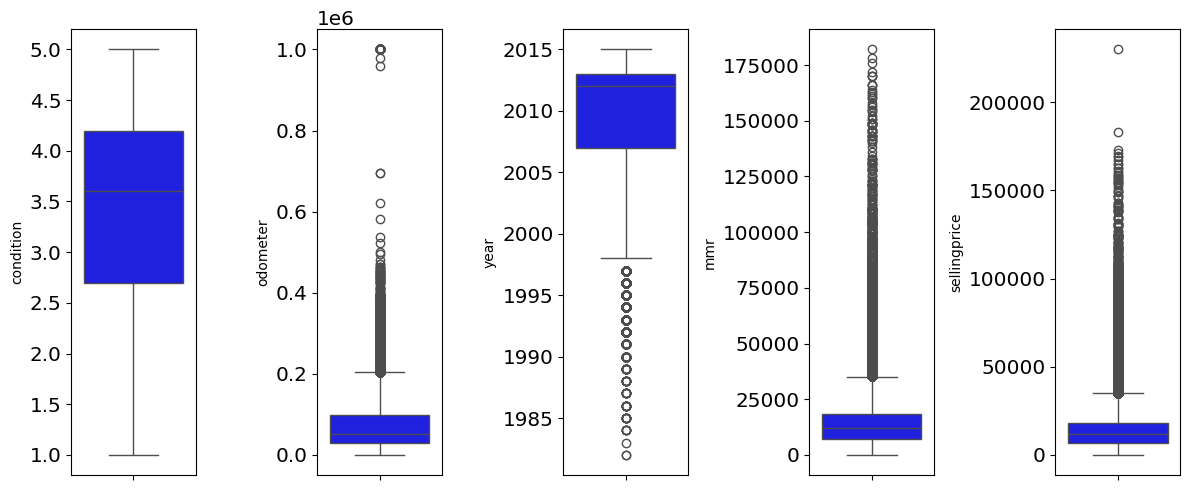

In [21]:
# Create box plots for numerical features
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()

**Box Plots Observations**:
- The main outliers are visible in the `odometer` and `sellingprice` columns,
- Columns that appear to have a fairly skewed distribution are also visible in `year`, `odometer`, `mmr`, `sellingprice`.

### Distribution plots (Numerical)

KeyboardInterrupt: 

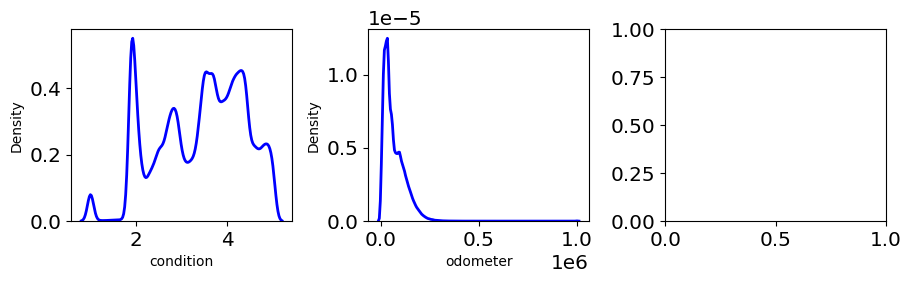

In [22]:
# Create distribution plots for numerical features
plt.figure(figsize=(15,5))
for i in range(0, len(features)):
    plt.subplot(2, len(features), i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

**Distribution Plots Observations**:
- As observed in the previous box plot, the `year`, `mmr`, and `sellingprice` columns have a skewed distribution, especially in the `odometer` column,
- The `condition` column has a multimodal distribution direction where the distribution is close to normal.

### Violin Plots (Numerical)

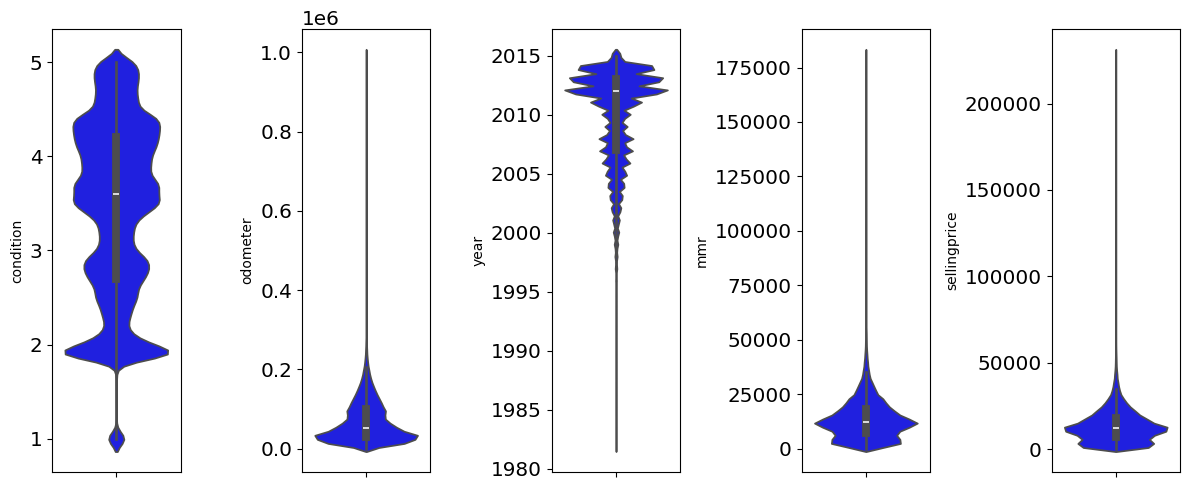

In [ ]:
# Create vilin plots for numerical features
for i in range(0, len(features)):
    plt.subplot(1, len(features), 1+i)
    sns.violinplot(y=df[features[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

**Violin Plots Observations**:

- Columns `odometer`, `mmr`, and `selling price` are all right-skewed, indicating that the majority of the data points are concentrated at the lower end of the scale with fewer high-value outliers. This suggests that most cars have lower mileage, lower market-related values, and sell for lower prices.
- Column `condition` seems to be normally distributed with a concentration around a median value. 
- The `year` distribution is bimodal, indicating two periods with higher frequencies of data points.

### Count Plots (Categorical)

In [ ]:
print(categorical)

['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']


In [ ]:
# Split categorical columns into two lists
categorical_1 = ['make', 'model', 'trim', 'body', 'transmission']
categorical_2 = ['vin', 'state', 'color', 'interior', 'seller', 'saledate']

#### make

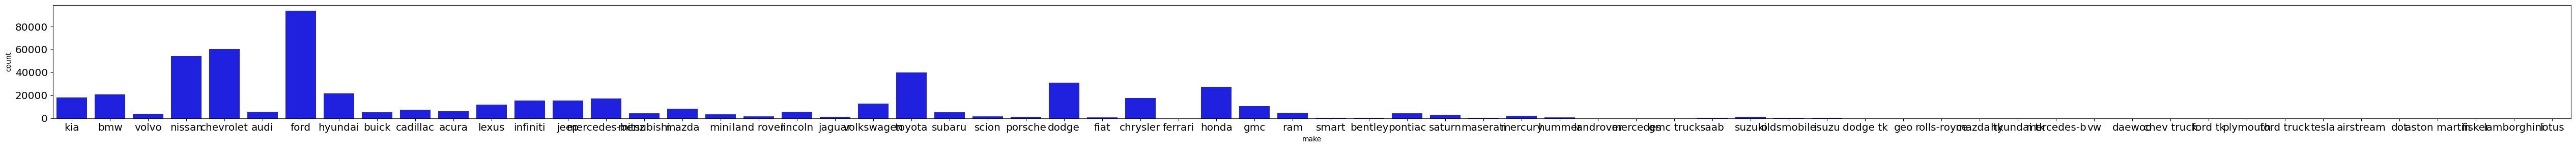

In [ ]:
# Create bar chart for make column
plt.figure(figsize=(150, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['make'], color='blue', orient='v')
plt.tight_layout()

#### model

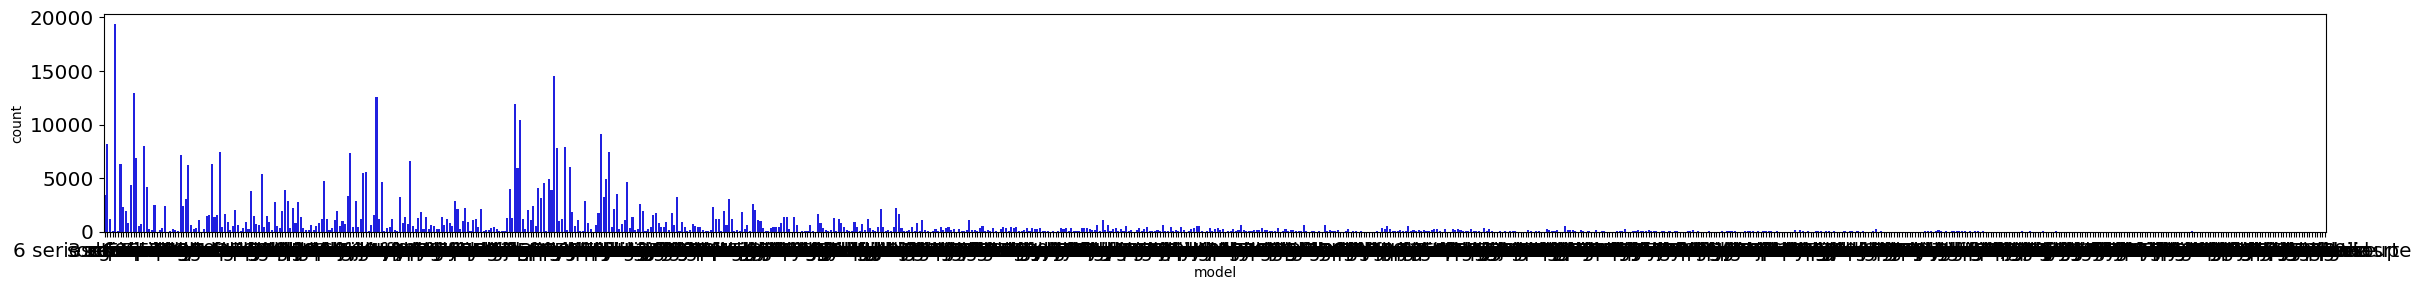

In [ ]:
# Create bar chart for model column
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['model'], color='blue', orient='v')
plt.tight_layout()

#### trim

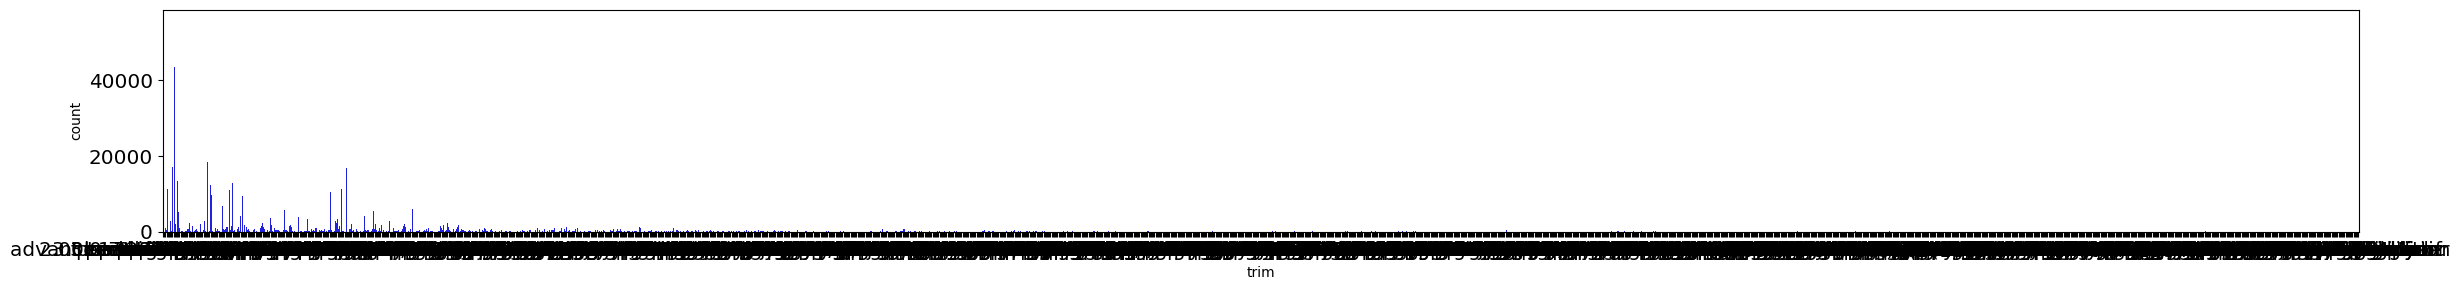

In [ ]:
# Create bar chart for trim column
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['trim'], color='blue', orient='v')
plt.tight_layout()

#### body

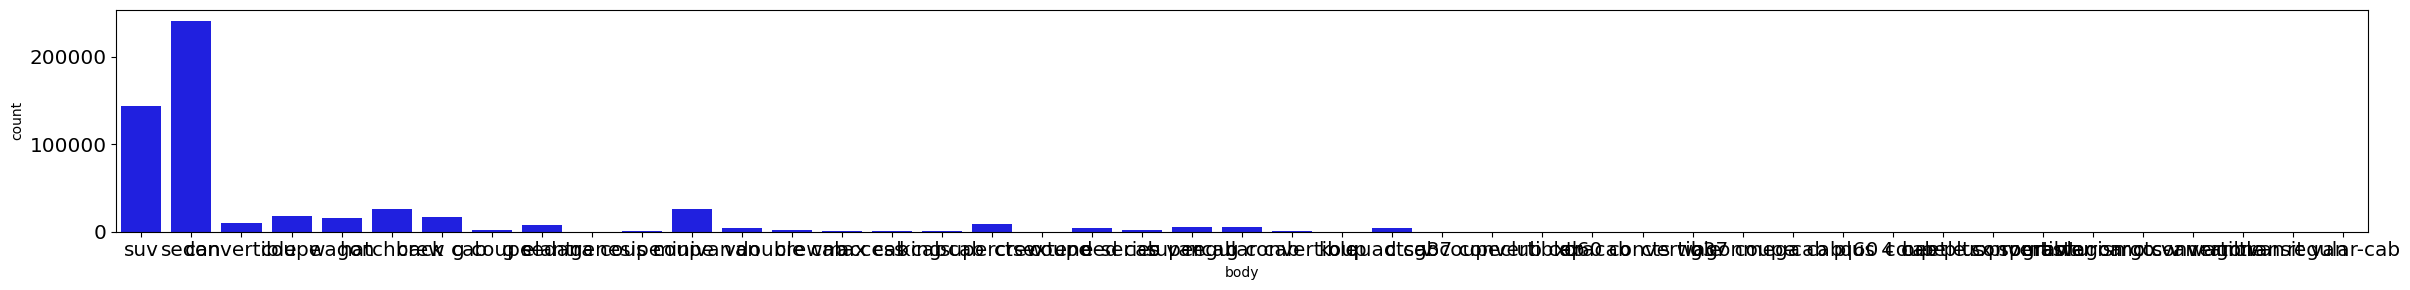

In [ ]:
# Create bar chart for body column
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['body'], color='blue', orient='v')
plt.tight_layout()

#### transmission

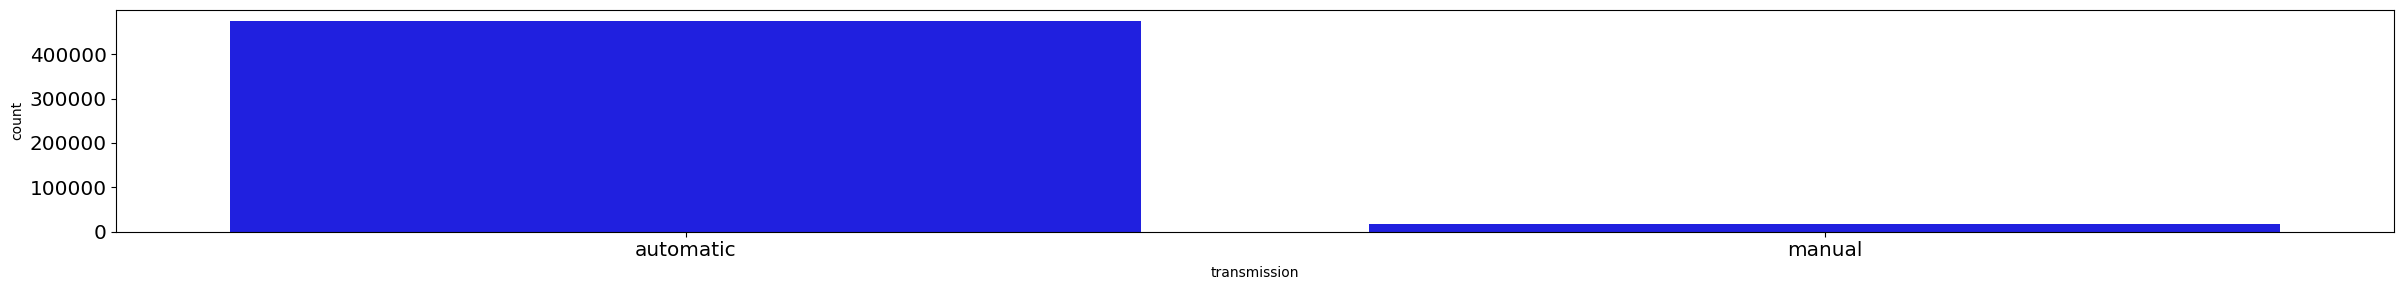

In [ ]:
# Create bar chart for transmision column
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['transmission'], color='blue', orient='v')
plt.tight_layout()

#### color

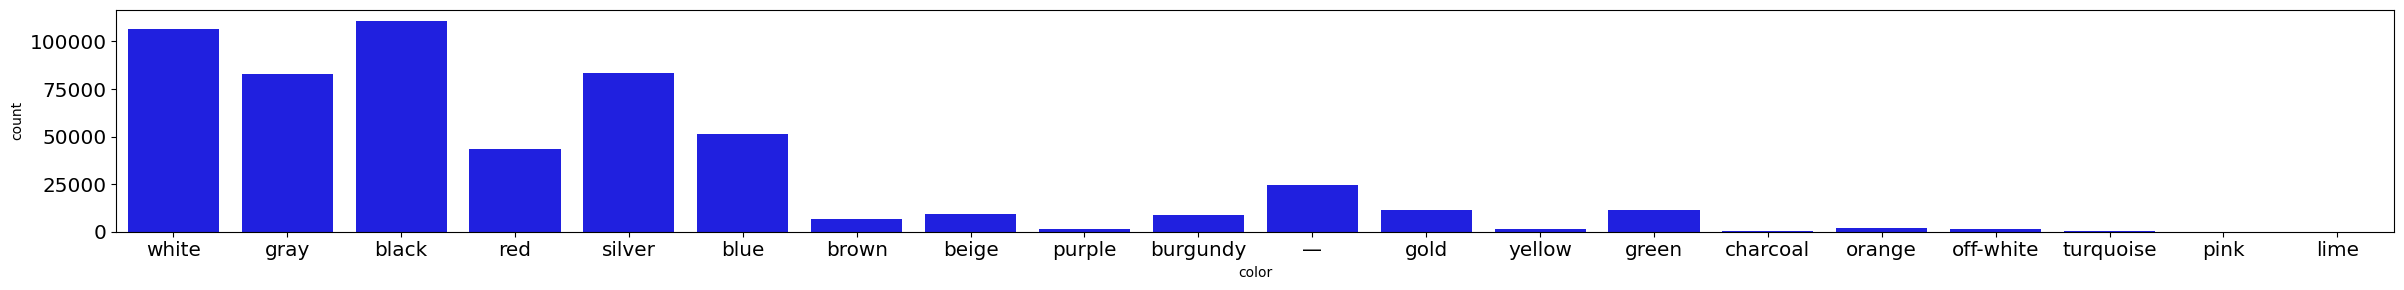

In [ ]:
# Create bar chart for color column
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['color'], color='blue', orient='v')
plt.tight_layout()

#### interior

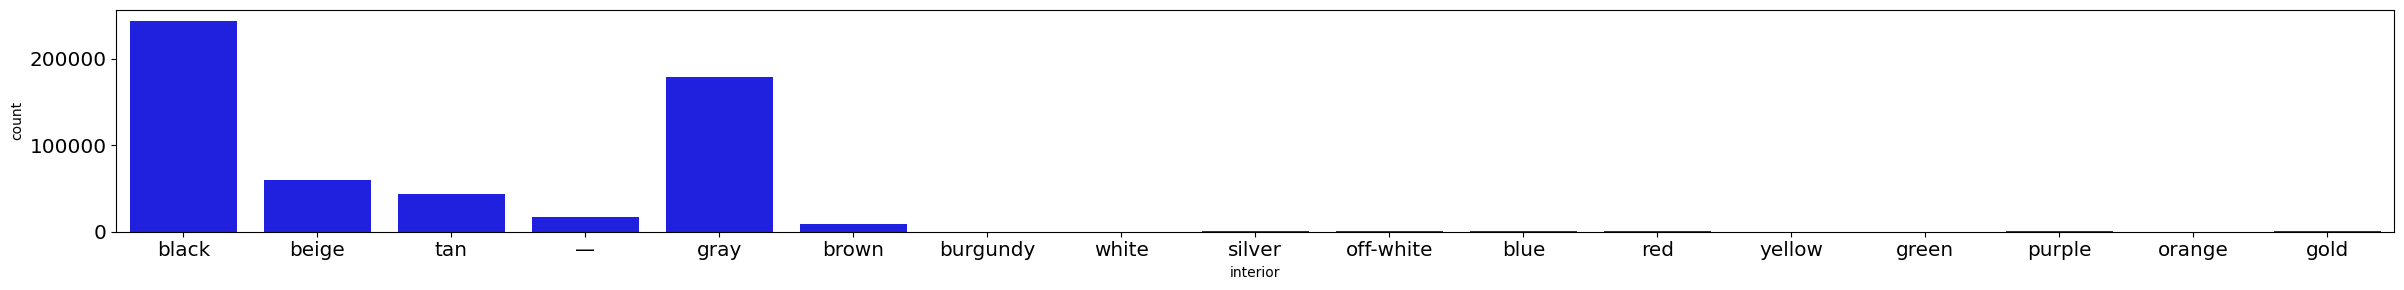

In [ ]:
# Create bar chart for interior column
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['interior'], color='blue', orient='v')
plt.tight_layout()

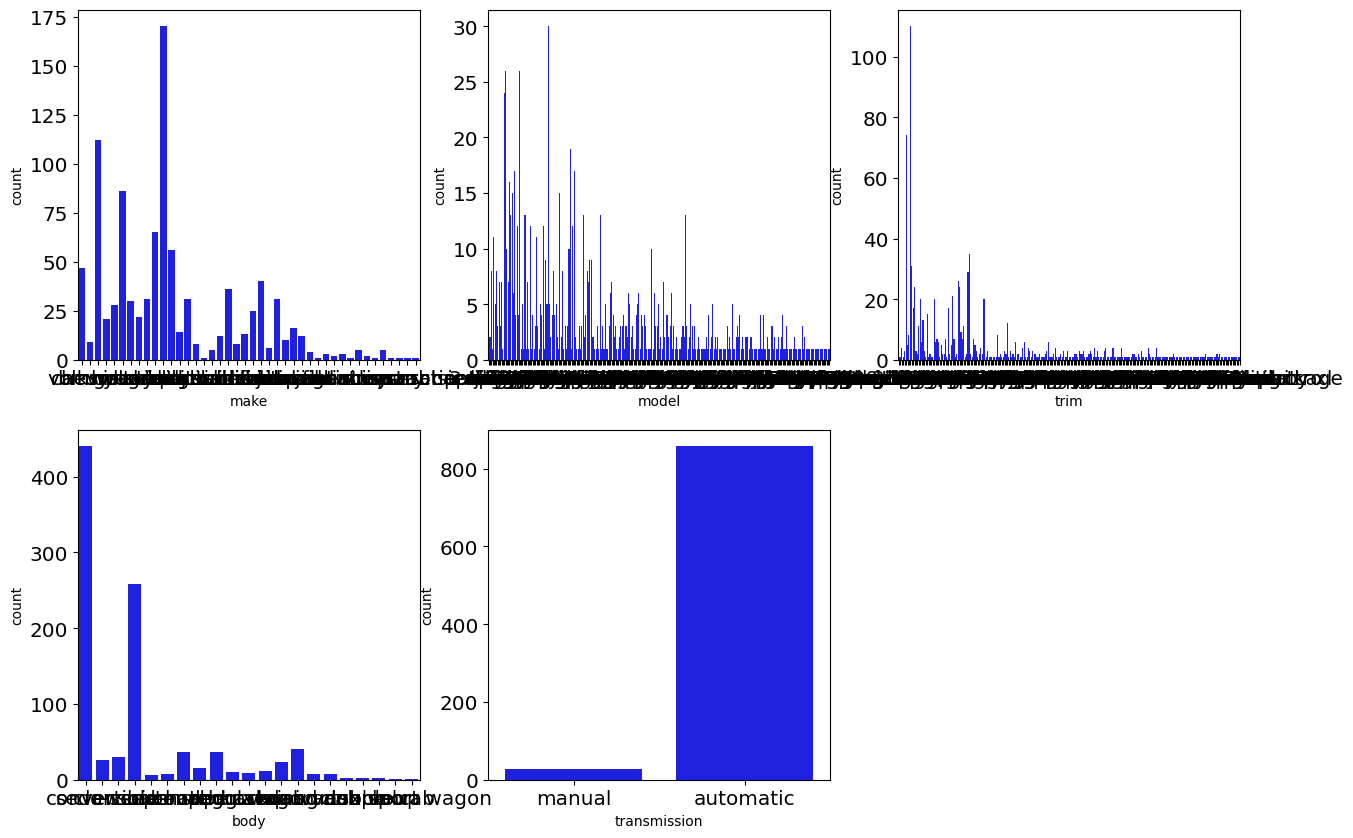

In [ ]:
# Create bar charts for categorical_1 list
df_sample = df.sample(1000, random_state = 123)
plt.figure(figsize=(15, 10))
for i in range(0, len(categorical_1)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[categorical_1[i]], color = 'blue', orient = 'v')

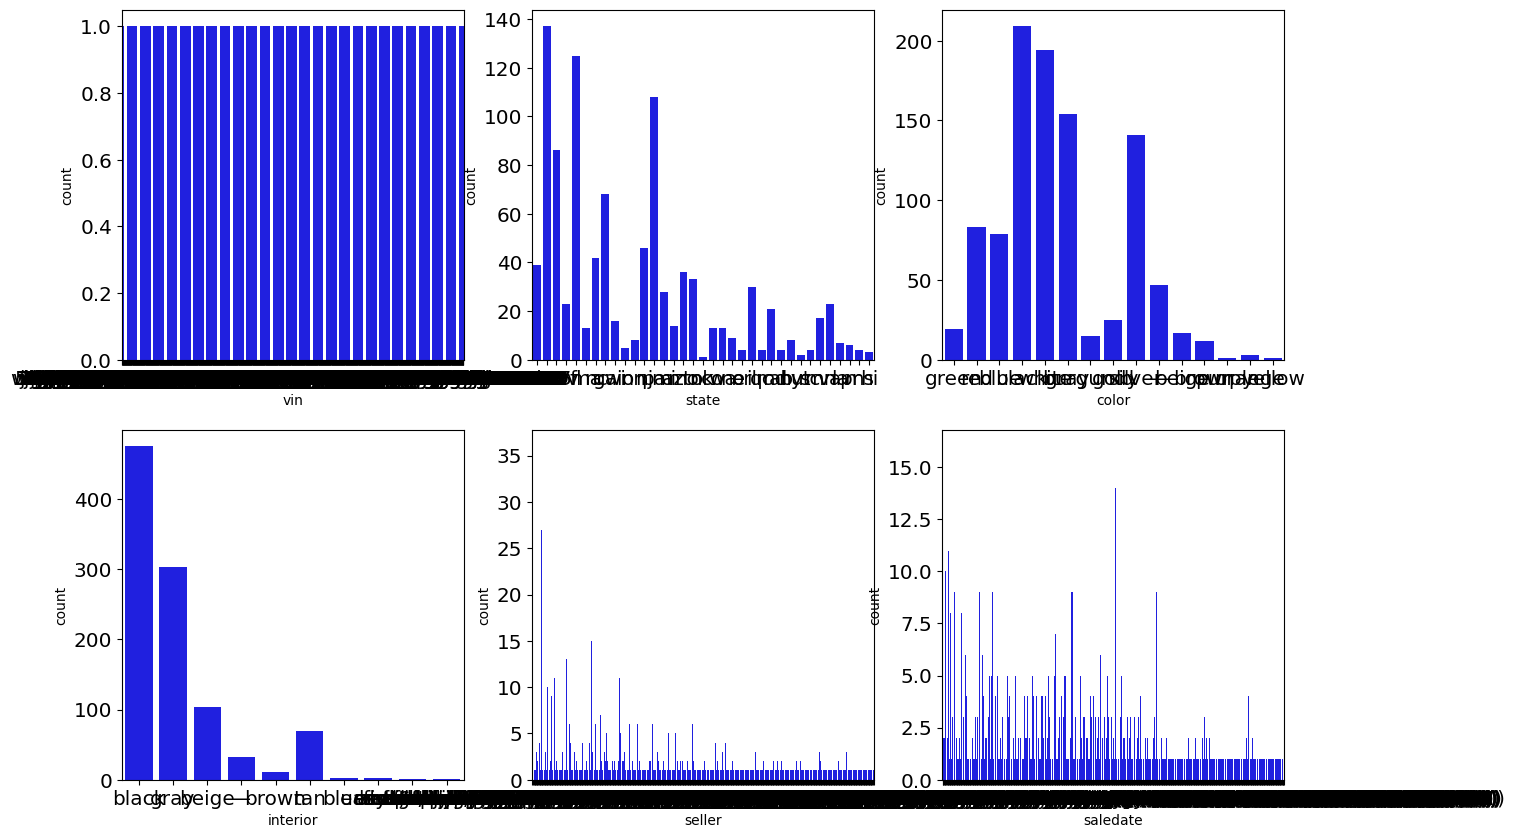

In [ ]:
# Create bar charts for categorical_2 list
plt.figure(figsize=(15, 10))
for i in range(0, len(categorical_2)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[categorical_2[i]], color = 'blue', orient = 'v')

**Count Plots Observations**:
- The `make`, `model`, `trim`, `body`, `vin`, `state`, `color`, `interior`, and `seller` columns have a lot of categories, so they need to be reviewed again column that will be the target in modeling
- `make`: The dataset shows a higher frequency of vehicles from brands like Kia, BMW, and Nissan, indicating their dominance or preference in the market.
- `model`: A vast range of models are present, with certain models appearing more frequently, highlighting their popularity.
- `body`: SUVs and sedans are the predominant body types, suggesting they are the preferred choice among consumers.
- `transmission`: The column for transmission type shows a significant majority of vehicles have automatic transmissions.
- `color`: The columns for both exterior and interior colors reveal a preference for neutral colors, with white, black, and gray being most common.

-`vin`, `seller`, `saledate` are not displayed because they have the most unique values.

## Multivariate Analysis

In [ ]:
correlation_matrix = df[numerical].corr()

### Correlation Heatmap

<Axes: >

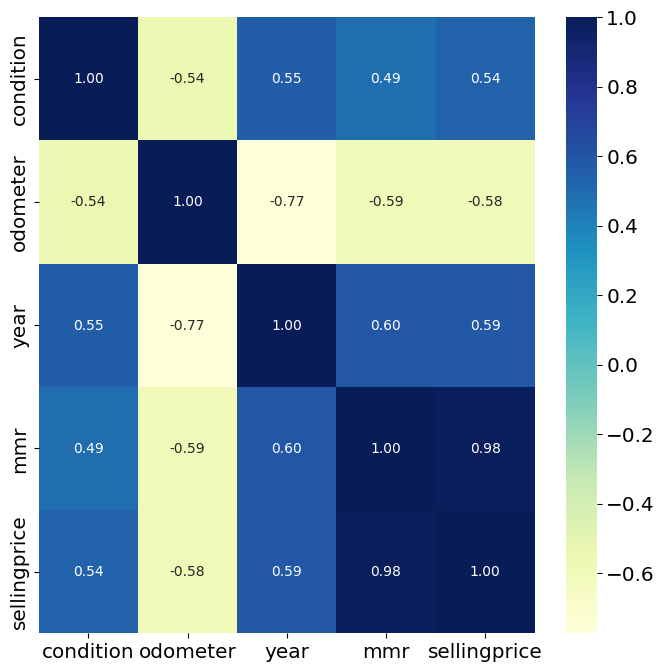

In [ ]:
# Create heatmap of the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(df[numerical].corr(), cmap='YlGnBu', annot=True, fmt='.2f')

From the *correlation heatmap* above it can be seen that:
* The target of this analysis is `sellingprice` and has a very strong positive correlation with `mmr` (strong potential feature),
* Target `sellingprice` also has a fairly high positive correlation with `year` and `condition`, and a negative correlation with `odometer` (decent potential feature),
* `year` has a fairly strong negative correlation with `odometer`. There is a possibility that these two *features* are redundant (just one of them can be chosen for training data).

### Pair Plot

<Figure size 1500x1500 with 0 Axes>

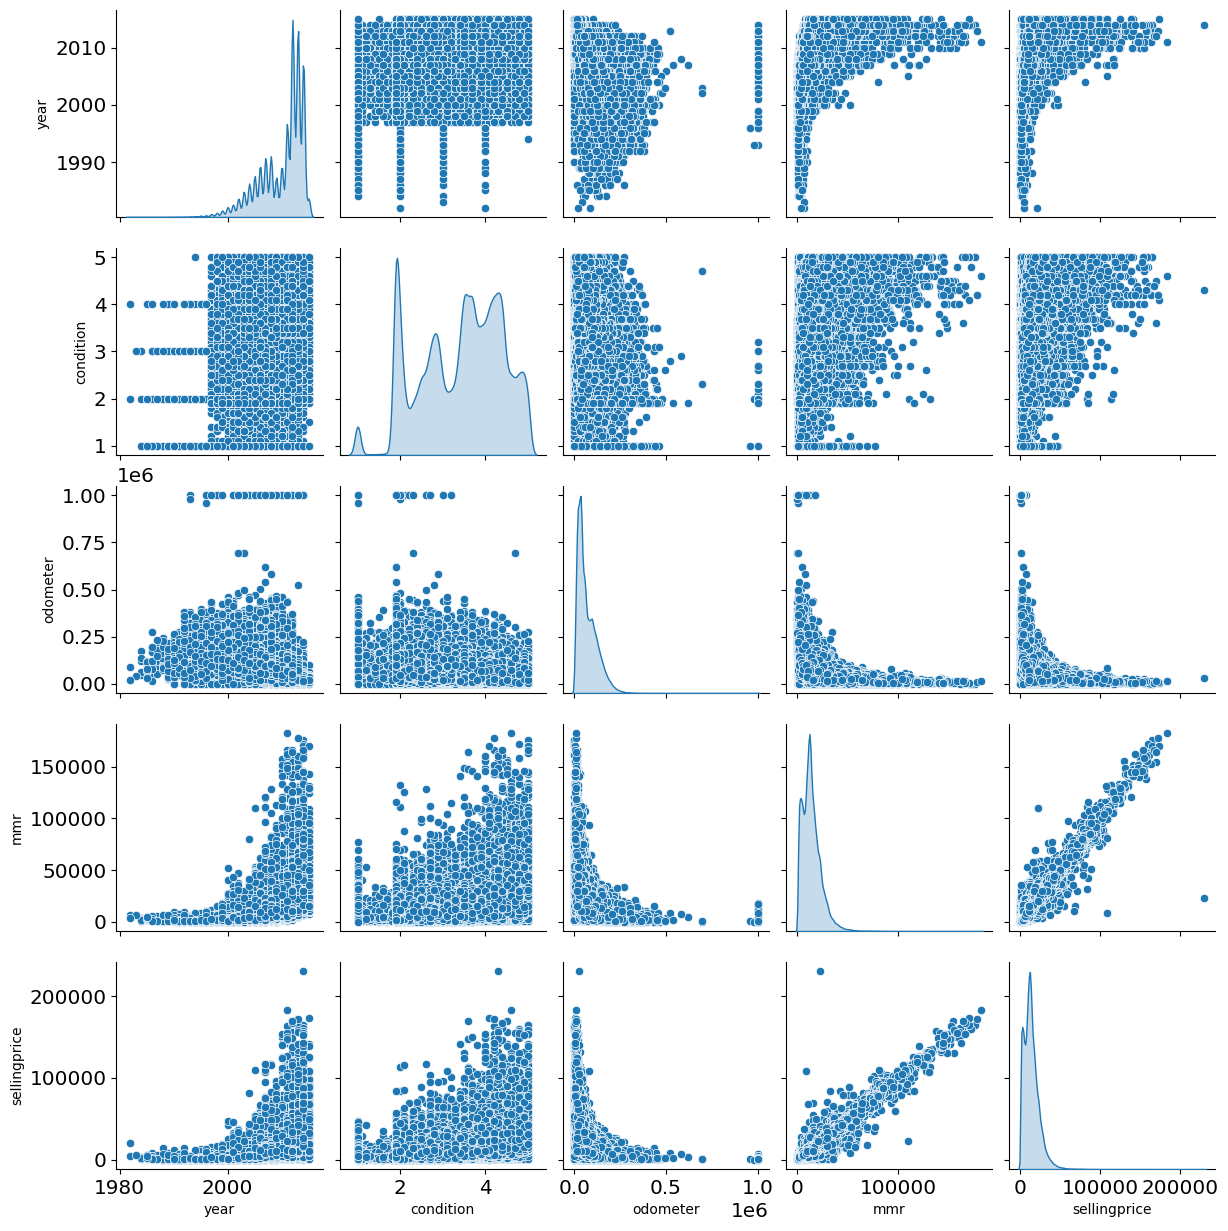

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

From the pair plot above, we can also see something similar:
* `mmr` clearly has a linear correlation with `sellingprice`,
* `year` and `odometer` clearly have a fairly strong inverse correlation.

### Category Column vs Target Variable

In [ ]:
categorical

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']

#### Top 10 Used Car Sold (Brands)

In [ ]:
# Identify the top 10 most common values in column make
df['make'].value_counts().iloc[:10]

make
ford         93997
chevrolet    60587
nissan       54017
toyota       39966
dodge        30955
honda        27351
hyundai      21836
bmw          20793
kia          18084
chrysler     17485
Name: count, dtype: int64

Text(0.5, 1.0, 'Make')

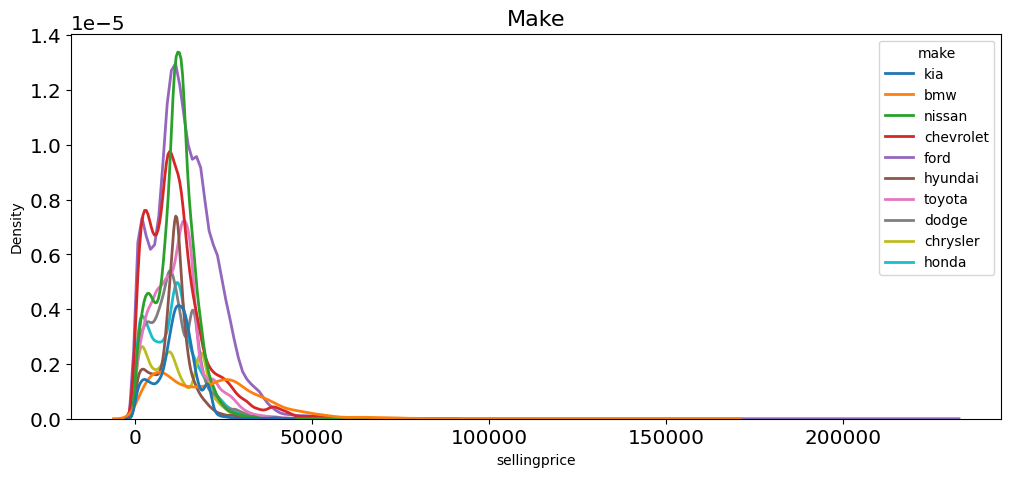

In [ ]:
df['make'] = df['make'].str.lower()
make_top = df[df['make'].isin(['ford', 'chevrolet', 'nissan', 'toyota', 'dodge', 'honda', 'hyundai', 'bmw', 'kia', 'chrysler'])]
sns.kdeplot(x='sellingprice', hue='make', data=make_top)
plt.title('Make', fontsize=16)

#### Top 10 Used Car Sold (Model)

In [ ]:
# Identify the top 10 most common values in column model
df['model'].value_counts().iloc[:10]

model
altima           19349
f-150            14479
fusion           12946
camry            12549
escape           11893
focus            10399
accord            9155
3 series          8204
impala            7957
grand caravan     7941
Name: count, dtype: int64

Text(0.5, 1.0, 'Model')

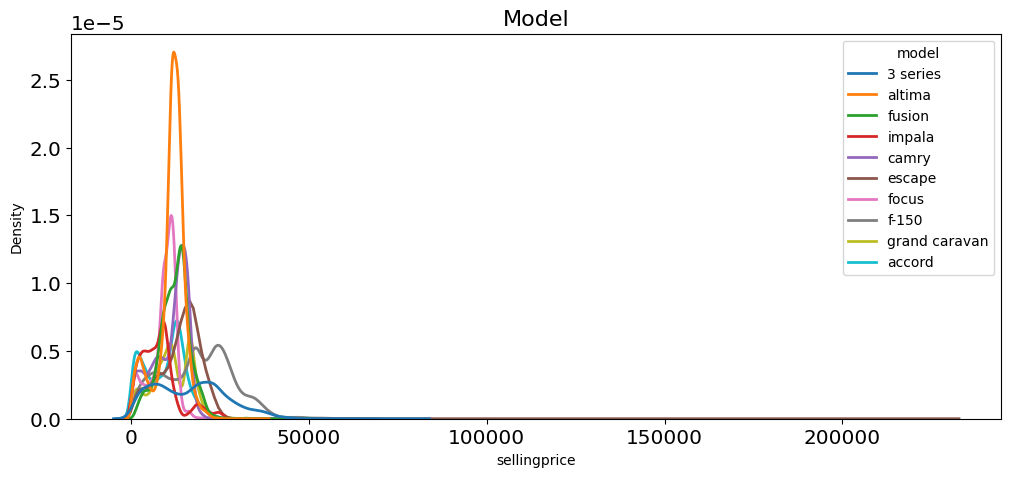

In [ ]:
df['model'] = df['model'].str.lower()
model_top = df[df['model'].isin(['altima', 'f-150', 'fusion', 'camry', 'escape', 'focus', 'accord', '3 series', 'impala', 'grand caravan'])]
sns.kdeplot(x = 'sellingprice', hue = 'model', data = model_top)
plt.title('Model', fontsize = 16)

#### Top 10 Used Car Sold (Trim)

In [ ]:
# Identify the top 10 most common values in column trim
df['trim'].value_counts().iloc[:10]

trim
base       55842
se         43691
lx         20782
limited    18358
lt         16984
xlt        16745
ls         13535
le         12929
gls        12333
s          12280
Name: count, dtype: int64

Text(0.5, 1.0, 'Trim')

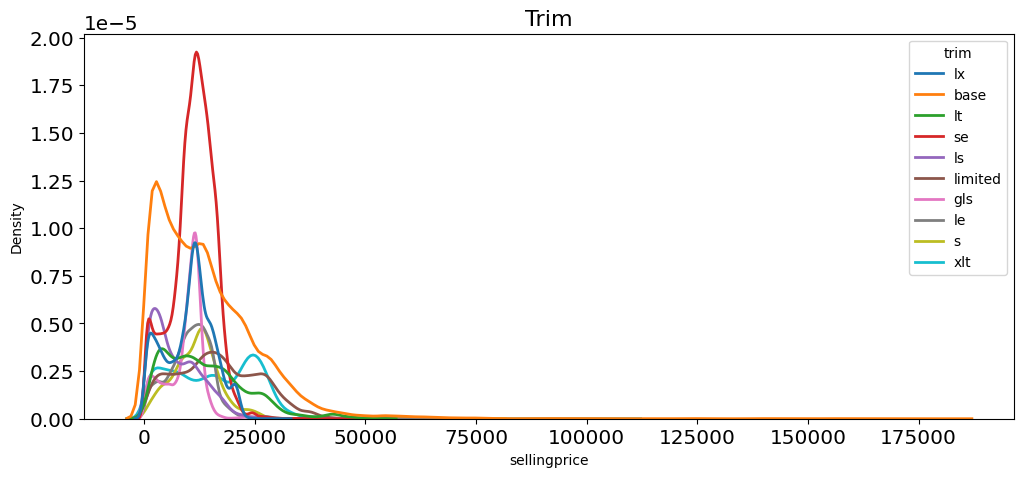

In [ ]:
df['trim'] = df['trim'].str.lower()
trim_top = df[df['trim'].isin(['base', 'se', 'lx', 'limited', 'lt', 'xlt', 'ls', 'le', 'gls', 's'])]
sns.kdeplot(x = 'sellingprice', hue = 'trim', data = trim_top)
plt.title('Trim', fontsize = 16)

#### Top 10 Used Car Sold (Body)

In [ ]:
# Identify the top 10 most common values in column body
df['body'].value_counts().iloc[:10]

body
sedan          241343
suv            143844
hatchback       26237
minivan         25529
coupe           17752
crew cab        16394
wagon           16129
convertible     10476
supercrew        9033
g sedan          7417
Name: count, dtype: int64

Text(0.5, 1.0, 'Body')

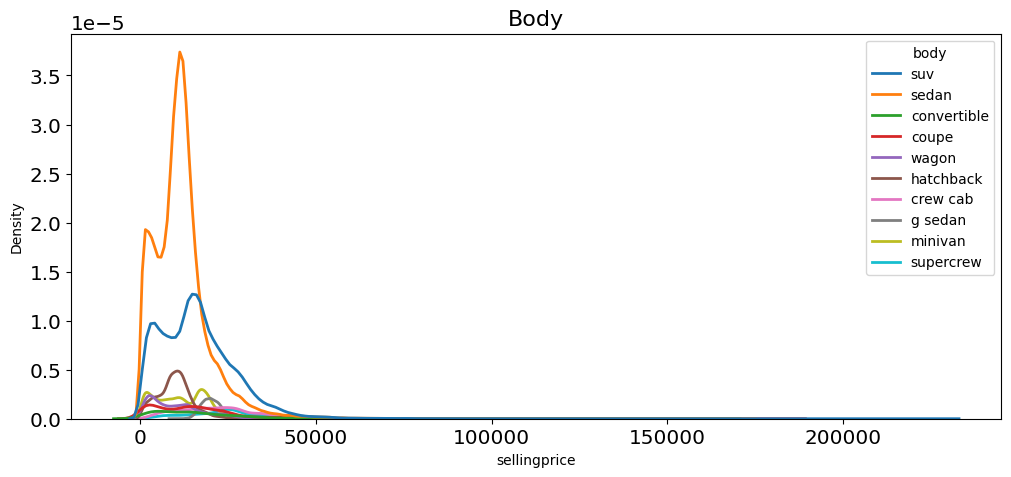

In [ ]:
df['body'] = df['body'].str.lower()
body_top = df[df['body'].isin(['sedan', 'suv', 'hatchback', 'minivan', 'coupe', 'crew cab', 'wagon', 'convertible', 'supercrew', 'g sedan'])]
sns.kdeplot(x = 'sellingprice', hue = 'body', data = body_top)
plt.title('Body', fontsize = 16)

#### Top 10 Used Car Sold (Transmission)

Text(0.5, 1.0, 'Transmission')

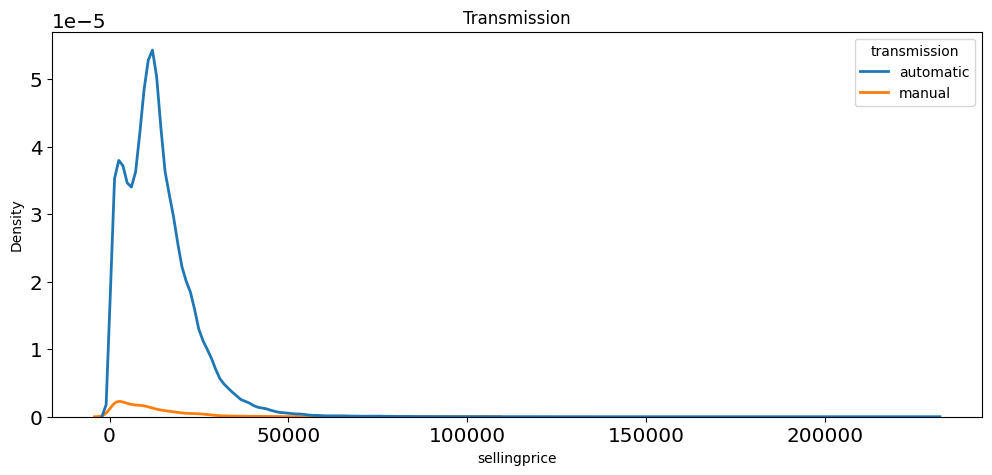

In [ ]:
# Identify the top 10 most common values in column transmission
sns.kdeplot(data=df, x='sellingprice', hue='transmission')
plt.title('Transmission')

#### Top 10 Used Car Sold (State)

In [ ]:
# Identify the top 10 most common values in column state
df['state'].value_counts().iloc[:10]

state
fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23486
nc    21845
oh    21575
tn    20895
Name: count, dtype: int64

Text(0.5, 1.0, 'State')

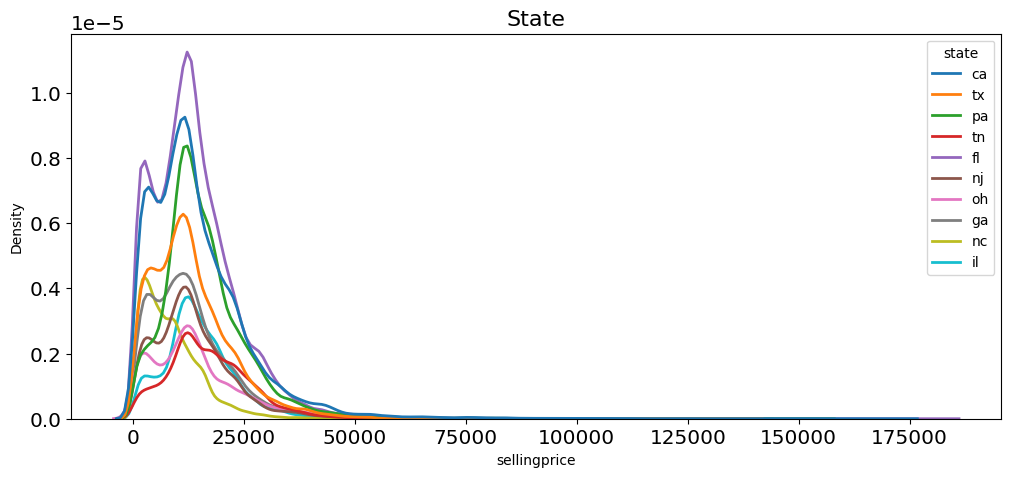

In [ ]:
df['state'] = df['state'].str.lower()
state_top = df[df['state'].isin(['fl', 'ca', 'pa', 'tx', 'ga', 'nj', 'il', 'nc', 'oh', 'tn'])]
sns.kdeplot(x = 'sellingprice', hue = 'state', data = state_top)
plt.title('State', fontsize = 16)

#### Top 10 Used Car Sold (Color)

In [ ]:
# Identify the top 10 most common values in column color
df['color'].value_counts().iloc[:10]

color
black     110970
white     106673
silver     83389
gray       82857
blue       51139
red        43569
—          24685
green      11382
gold       11342
beige       9222
Name: count, dtype: int64

Text(0.5, 1.0, 'Color')

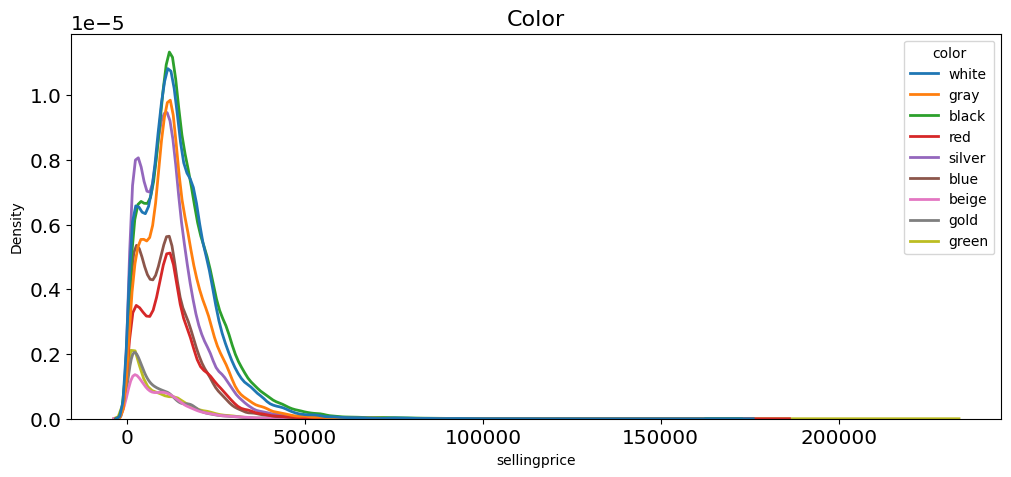

In [ ]:
df['color'] = df['color'].str.lower()
color_top = df[df['color'].isin(['black', 'white', 'silver', 'gray', 'blue', 'red', '-', 'green', 'gold', 'beige'])]
sns.kdeplot(x = 'sellingprice', hue = 'color', data = color_top)
plt.title('Color', fontsize = 16)

#### Top 10 Used Car Sold (Interior)

In [ ]:
# Identify the top 10 most common values in column interior
df['interior'].value_counts().iloc[:10]

interior
black        244325
gray         178578
beige         59758
tan           44093
—             17076
brown          8640
red            1359
blue           1138
silver         1099
off-white       480
Name: count, dtype: int64

Text(0.5, 1.0, 'Interior')

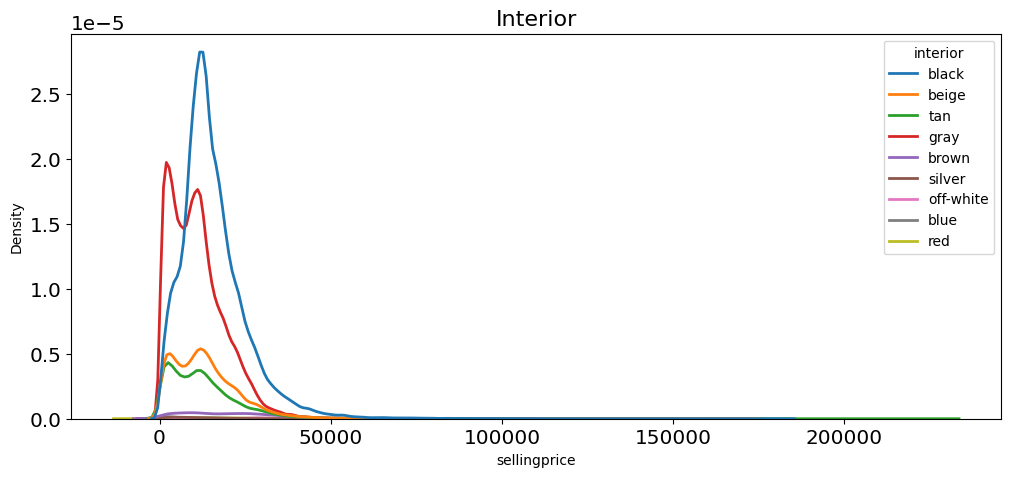

In [ ]:
df['interior'] = df['interior'].str.lower()
interior_top = df[df['interior'].isin(['black', 'gray', 'beige', 'tan', '-', 'brown', 'red', 'blue', 'silver', 'off-white'])]
sns.kdeplot(x = 'sellingprice', hue = 'interior', data = interior_top)
plt.title('Interior', fontsize = 16)

#### Top 10 Used Car Sold (Seller)

In [ ]:
# Identify the top 10 most common values in column seller
df['seller'].value_counts().iloc[:10]

seller
nissan-infiniti lt                       19693
ford motor credit company,llc            19162
the hertz corporation                    18299
santander consumer                       15285
avis corporation                         12540
nissan infiniti lt                        9962
wells fargo dealer services               8796
tdaf remarketing                          7209
enterprise veh exchange/rental            6853
ge fleet services for itself/servicer     6692
Name: count, dtype: int64

Text(0.5, 1.0, 'Seller')

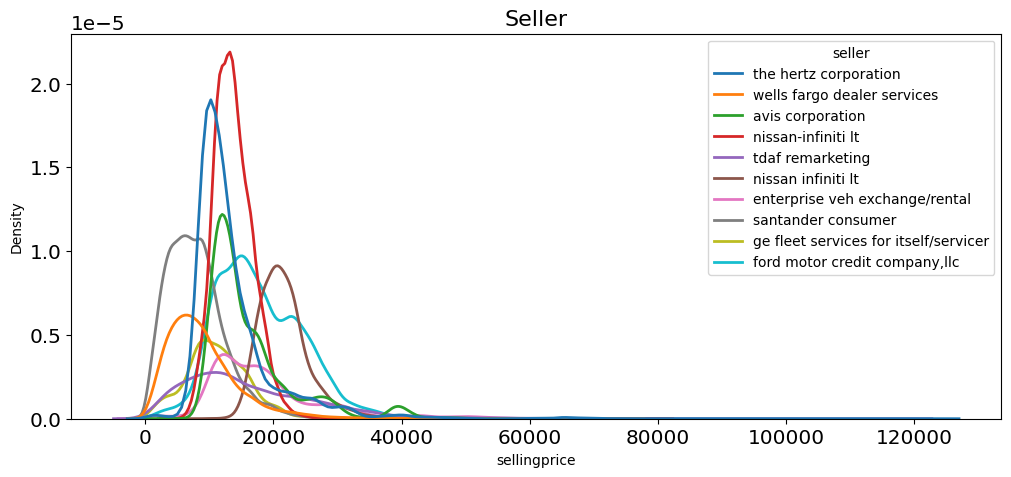

In [ ]:
df['seller'] = df['seller'].str.lower()
seller_top = df[df['seller'].isin(['nissan-infiniti lt', 'ford motor credit company,llc', 'the hertz corporation', 'santander consumer', 'avis corporation' ,'nissan infiniti lt', 'wells fargo dealer services', 'tdaf remarketing', 'enterprise veh exchange/rental', 'ge fleet services for itself/servicer'])]
sns.kdeplot(x = 'sellingprice', hue = 'seller', data = seller_top)
plt.title('Seller', fontsize = 16)

For the features `model`, `trim`, `vin`, `saledate`, `seller` the plot is not displayed because the cardinality is very high.

Observation:
- All columns except `transmission` have many categories, so each column is regrouped based on the highest number (top 10) to make it easier to see the distribution,
* The `vin` and `saledate` columns do not need to be correlated to the `target` because in business terms vin and saledate do not affect the price of a car (`selling price`),
- The distribution of automatic transmissions seems to tend to have a higher selling price than manual transmissions (this shows that `transmission` is a promising feature to be used in modeling),
* It seems that the features `make`, `body`, `interior` have significant differences between categories (need to be handled further with feature encoding),

* It seems that the `state` and `color` features have a distribution that looks significant between the top 5 categories and the others, but between the top 5 categories there is no significant distribution difference.

Several things found from the EDA dataset above are as follows:
- There are some distributions that are skewed or there are even distributions with unclear directions (`condition`) and have outliers.
- Some features have a clear correlation, so they will be used in modeling.
- Columns that have a large number of unique values need to be handled further in the encoding feature.
- There are features `year`, `condition`, `odometer` that have a high correlation with each other so it is possible that these features are redundant and a feature needs to be dropped.

## Business Insights

### Price Segmentation

<Axes: title={'center': 'Price Segmentation'}, ylabel='count'>

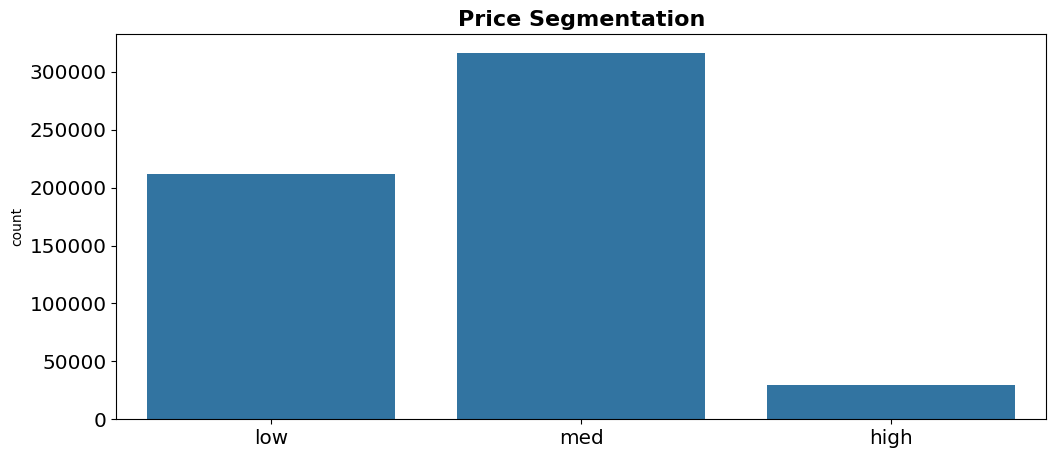

In [ ]:
# Segment the sellingprice column
price_segmentation = np.where(df['sellingprice']<10000, 'low', np.where(df['sellingprice']>30000, 'high', 'med'))
order = ['low', 'med', 'high']
plt.title('Price Segmentation', fontsize = 16, fontweight='bold')
sns.countplot(x = price_segmentation, order = order, data=df)

From the following countplot, you can get the insight that the prices of cars in the medium category have the highest number, while the high category has the fewest.

### Transmission

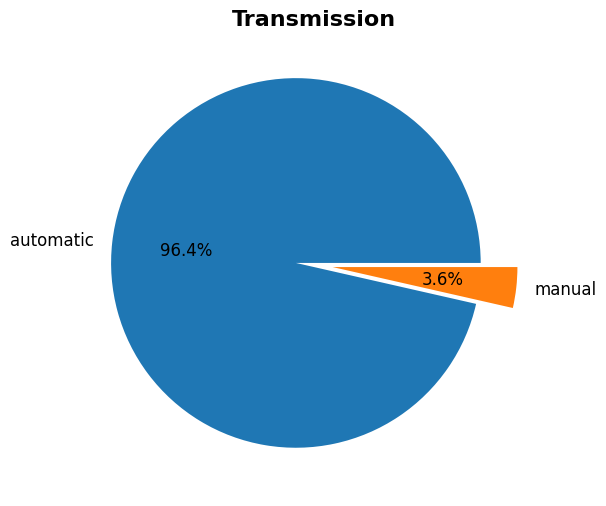

In [ ]:
# Represent the distribution of values in transmission in a pie chart
df['transmission'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%.1f%%', figsize=(6,6),fontsize=12)
plt.title('Transmission',fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()

From the transmission, it can be seen that the majority of cars from the dataset is automatic.

### Car Preferences

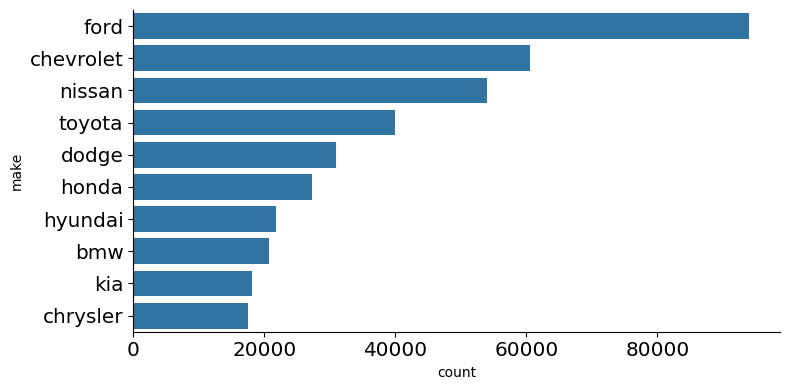

In [ ]:
# Create a bar plot for make column
df3 = make_top['make'].value_counts().reset_index()
df3.columns = ['make', 'count']
df3

sns.catplot(x="count",
            y="make",
            kind="bar", 
            order = df3['make'],  height=4,
            aspect=2,
            data=df3)

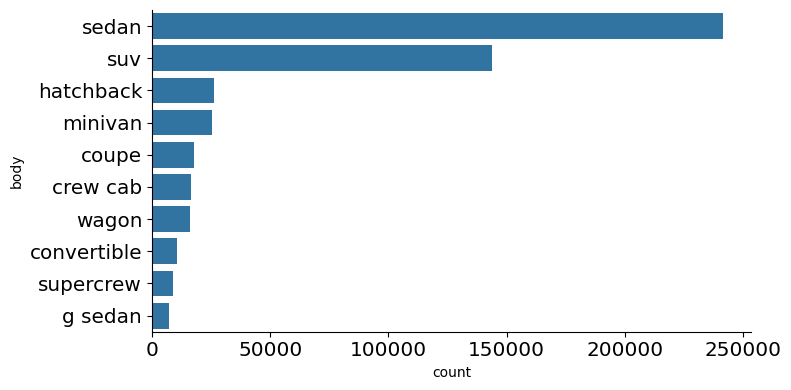

In [ ]:
# Create a bar plot for body column
df4 = body_top['body'].value_counts().reset_index()
df4.columns = ['body', 'count']
df4

sns.catplot(x="count",
            y="body",
            kind="bar", 
            order = df4['body'],  height=4,
            aspect=2,
            data=df4)

From the barplot above we can observe that:
- **Ford** and **Nissan** are the most sold used car brands.
- The highest preference for car types based on cars sold is **sedan** and **SUV**.

Impact:
Assist companies in offering or purchasing brands and types of cars with the highest sales on the market.

### Segmentation

In [ ]:
# Identify unique values in column condition
df['condition'].unique()

array([5. , 4.5, 4.1, 4.3, 1. , 3.4, 2. , 4.2, 3. , 4.8, nan, 4.9, 1.7,
       1.9, 2.9, 3.8, 4.4, 4.7, 3.2, 4. , 2.5, 3.7, 3.9, 3.1, 2.8, 4.6,
       3.6, 3.5, 2.6, 2.1, 2.2, 2.7, 2.4, 3.3, 2.3, 1.5, 1.6, 1.8, 1.2,
       1.4, 1.1, 1.3])

In [ ]:
# Segment condition column 
condition_define=[]

for i, column in df.iterrows():
    condition=column['condition']
    if condition < 1:
        define = 'very bad'
    elif condition < 2:
        define = 'bad'
    elif condition < 3:
        define = 'moderate'
    elif condition < 4:
        define = 'good'
    else:
        define = 'excellent'
    condition_define.append(define)

df['condition_rate'] = condition_define

In [ ]:
#Create a new column with price segmentation
df['price_segmentation'] = price_segmentation

In [ ]:
# Extracting the 'condition_rate' column from the DataFrame 'df' and storing it in the variable 'condition_rate'.
condition_rate = df['condition_rate']

# Extracting the 'price_segmentation' column from the DataFrame 'df' and storing it in the variable 'price_segmentation'.
price_segmentation = df['price_segmentation']

In [ ]:
# Create a cross-tabulation of 'condition_rate' and 'price_segmentation' columns,
# and normalize it by row (index) to calculate proportions.
df_cross_prop = pd.crosstab(index=condition_rate,
                            columns=price_segmentation,
                            normalize='index'
                            )
df_cross_prop

price_segmentation,high,low,med
condition_rate,,,
bad,0.002121,0.874713,0.123167
excellent,0.107535,0.127736,0.764729
good,0.037112,0.321825,0.641064
moderate,0.011563,0.651279,0.337158


In [ ]:
# Create a cross-tabulation to analyze the relationship between 'condition_rate' and 'price_segmentation'
df_cross = pd.crosstab(index=condition_rate,
                       columns=price_segmentation
                      )
df_cross

price_segmentation,high,low,med
condition_rate,,,
bad,108,44550,6273
excellent,21820,25919,155172
good,6401,55508,110570
moderate,1532,86288,44670


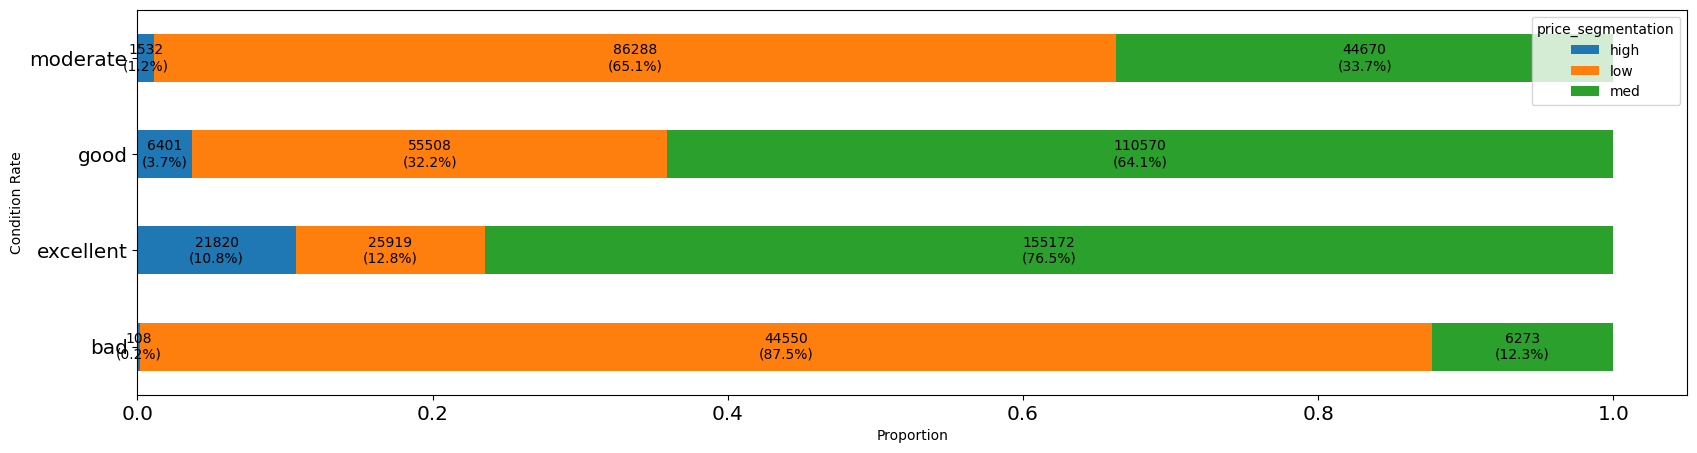

In [ ]:
# Create horizontal stacked bar chart to visualize proportions
df_cross_prop.plot(kind='barh',
                   stacked=True,
                   figsize=(20,5),
                   mark_right=True
                  )

plt.xlabel('Proportion')
plt.ylabel('Condition Rate')


for n, x in enumerate([*df_cross.index.values]):
    for (proportion, count, y_loc) in zip(df_cross_prop.loc[x],
                                          df_cross.loc[x],
                                          df_cross_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=10)

Categorize the condition of the car with the following details:

- **< 1** = `very bad`
- **1 - 2** = `bad`
- **2 - 3** = `moderate`
- **3 - 4** = `good`
- **4 - 5** = `excellent`

After categorizing the conditions, we tried to see the distribution of the prices that had been segmented previously.
- A car with `bad' condition shows that car prices are dominated by the low price segment, namely 87.5%, while there are still a few people
   who sold cars at high prices were 108 (0.2%)
- Cars with `excellent' condition show that car prices are dominated by the medium price segment, namely 76.5%, and car prices with value
   low and high do not have such a large gap (with a gap of 2%).

# **PHASE 2: Preprocessing**

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset again 
**As Phase 1 involved creation of new columns and other manipulations required for EDA process**

In [ ]:
#Get path (independently from who is running the command)

import os
os.getcwd()

os.listdir(os.path.join('..', 'car_prices')) # independent of the platform (unix, windows)

## We read the files
car_sales_data_path = os.path.join("..", "car_prices", "car_prices.csv")
df = pd.read_csv(car_sales_data_path, on_bad_lines= "skip")

## Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


Observation\:
1. The data consists of 55811 rows,
2. It appears that some columns still have null/missing values (Non-Null Count < number of rows),
3. There seems to be no significant issue with the data type for each column (it is appropriate).

In [ ]:
df.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
61052,2013,Chevrolet,Cruze,LS,Sedan,manual,1g1pb5sh8d7151876,in,3.5,71703.0,blue,black,gm financial,8025,6000,Tue Dec 30 2014 10:10:00 GMT-0800 (PST)
318793,2012,Nissan,Sentra,2.0 SR,Sedan,automatic,3n1ab6ap7cl769649,mo,4.2,35142.0,black,gray,wright automotive inc,10650,10700,Tue Feb 17 2015 03:00:00 GMT-0800 (PST)
31143,2013,Chevrolet,Captiva Sport,LT Fleet,SUV,automatic,3gnal3ek6ds548131,tx,NaN,39492.0,white,black,steve landers toyota,12500,11100,Wed Dec 17 2014 10:20:00 GMT-0800 (PST)
299937,2011,Ford,F-150,XLT,SuperCrew,NaN,1ftfw1et2bfb34851,mi,4.7,38424.0,white,gray,automobiles paille inc,25200,24200,Thu Feb 19 2015 01:30:00 GMT-0800 (PST)
397469,2006,NaN,NaN,NaN,NaN,NaN,salae25486a376390,pa,2.6,120094.0,white,beige,r hollenshead auto sales inc,8125,9100,Fri Mar 06 2015 01:00:00 GMT-0800 (PST)


### Drop Column `mmr`

In [ ]:
# Drop the 'mmr' column from the DataFrame 'df'
df.drop(columns = 'mmr', inplace = True, axis = 1)

Reasons for dropping `mmr` column:
- The mmr column has different median and mean values so the distribution is skewed,
- In the correlation heatmap, it can be observed that the `mmr` column has a strong positive correlation with the `sellingprice` target, namely 0.98,
- In the pair plot, it can be observed that the `mmr` column has a linear correlation with the target `sellingprice`,

### Drop Column `state`

In [ ]:
# Categorize selling prices into 'low', 'med', or 'high' segments based on thresholds
price_segmentation = np.where(df['sellingprice']<10000, 'low', np.where(df['sellingprice']>30000, 'high', 'med'))

In [ ]:
# Convert the 'state' column to lowercase and categorize specific states while grouping others as 'others'
df['state'] = df['state'].str.lower()

# Define and apply function to categorize states and apply it to the DataFrame
def state(x):
    if x['state'] == 'fl':
        state = 'fl'
    elif x['state'] == 'ca':
        state = 'ca'
    elif x['state'] == 'pa':
        state = 'pa'
    elif x['state'] == 'tx':
        state = 'tx'
    elif x['state'] == 'ga':
        state = 'ga'
    elif x['state'] == 'nj':
        state = 'nj'
    elif x['state'] == 'il':
        state = 'il'
    elif x['state'] == 'nc':
        state = 'nc'
    elif x['state'] == 'oh':
        state = 'oh'
    elif x['state'] == 'tn':
        state = 'tn'
    else:
        state = 'others'
    return state

df['state'] = df.apply(lambda x: state(x), axis=1)

<Axes: xlabel='count', ylabel='state'>

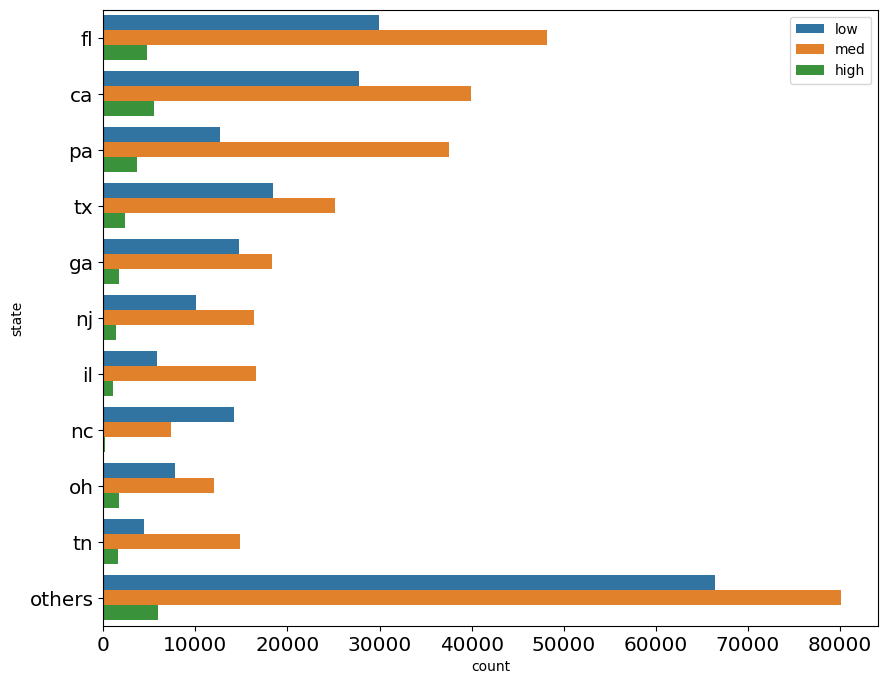

In [ ]:
# Visualizing car listings by state and price segmentation
plt.figure(figsize=(10,8))
hue_order = ['low', 'med', 'high']
order=['fl', 'ca', 'pa', 'tx', 'ga', 'nj', 'il', 'nc', 'oh', 'tn', 'others']
sns.countplot(y='state', data=df, hue=price_segmentation, hue_order=hue_order, order=order)

In [ ]:
# Drop the 'state' column from the DataFrame 'df'
df.drop(columns = 'state', inplace = True, axis = 1)

Reason for dropping `state` column:
- The distribution of price segmentation ratios (low/med/high) from each state has the same value,
- Each stage is dominated by medium, while the high segmentation is the least. Therefore, there does not appear to be any striking difference.

### Drop Column `vin`

In [ ]:
# Drop the 'vin' column from the DataFrame 'df'
df.drop(columns = 'vin', inplace = True, axis = 1)

Reasons for dropping the `vin` column:

VIN is an identification code that is usually useful for specific cars only (does not apply to all cars),
In business, the VIN or vehicle identification number has no influence on the target/label selling price.

### Drop Column `interior`

In [ ]:
# Remove the 'interior' column from the DataFrame 'df'
df.drop(columns = 'interior', inplace = True, axis = 1)

Reason for dropping the `interior` column: the `interior` column has the same value as `color` so it was decided to drop one of them. So we chose 'interior' because based on preferences, the body color outside the car is more influential than the interior.

### Drop Column `seller`

In [ ]:
# Remove the 'seller' column from the DataFrame 'df'
df.drop(columns = 'seller', inplace = True, axis = 1)

Reason for dropping the `seller` column: In our opinion, the Car-a-thon company does not look at sellers, because we will still filter vehicles based on condition, odometer, etc. (fair value). So, whoever the seller is can make sales (there is no difference). The `seller` column has a very large number of unique values (high cardinality), so it will make it difficult to perform feature encoding.

## Statistical Summary

In [ ]:
# Create two lists for numerical and categorical data
numerical_update = ['year', 'condition', 'odometer', 'sellingprice']
categorical_update = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'saledate']

In [ ]:
df[numerical_update].describe()

,year,condition,odometer,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13611.262461
std,3.966812,0.949439,53397.752933,9749.656919
min,1982.000000,1.000000,1.000000,1.000000
25%,2007.000000,2.700000,28374.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18200.000000
max,2015.000000,5.000000,999999.000000,230000.000000


In [ ]:
df[categorical_update].describe()

,make,model,trim,body,transmission,color,saledate
count,548510,548412,548160,545616,493458,558062,558811
unique,96,973,1975,86,2,20,3745
top,Ford,Altima,Base,Sedan,automatic,black,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,110970,5334


## Handle Missing Values

In [ ]:
# Number of missing values in each column
df.isna().sum().sort_values(ascending = False)

transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
odometer           94
year                0
sellingprice        0
saledate            0
dtype: int64

In [ ]:
# Percentage of missing values in each column
missing_values = df.isna().sum().sort_values(ascending = False)/len(df)*100
missing_values

transmission    11.695010
body             2.361263
condition        2.110553
trim             1.906011
model            1.860915
make             1.843378
color            0.134035
odometer         0.016821
year             0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

In [ ]:
missing_values[['body', 'condition', 'trim', 'model', 'make', 'color', 'odometer']].sum()

10.232976802532521

- `transmission`: impute with mode value (automatic),
- `body`, `trim`, `condition`, `color`, `odometer`, `make`, and `model`: drop them (because in total the percentage is only 10%),
- `year`, `saledate`, and `sellingprice`: do not have missing values so they do not need to be handled.

### Dataframe Impute (`transmission`) and Drop (`body`, `condition`, `make`, `color`, `odometer`)

In [ ]:
# Fill missing values in the 'transmission' column with the most common (mode) value.
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])

In [ ]:
# drop `body`, `model`, `trim`, `condition`, `color`, `odometer`, and `make`
df = df.dropna()

In [ ]:
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
condition       0
odometer        0
color           0
sellingprice    0
saledate        0
dtype: int64

## Handle Duplicated Data

In [ ]:
df.duplicated().sum()

0

There is no duplicate data in the dataset.

In [ ]:
print(numerical_update)
print(categorical_update)

['year', 'condition', 'odometer', 'sellingprice']
['make', 'model', 'trim', 'body', 'transmission', 'color', 'saledate']


#### **Column `make`**

In [ ]:
# Get unique values in the 'make' column
df['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Buick', 'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Geo', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [ ]:
# Calculate the number of unique 'make' values
len(df['make'].unique())

53

In [ ]:
# Convert the 'make' column to lowercase and count unique values
df['make'] = df['make'].str.lower()
len(df['make'].unique())

53

In [ ]:
# Display the top 9 most frequent values in the 'make' column
df['make'].value_counts().iloc[:9]

make
ford         91908
chevrolet    58817
nissan       53085
toyota       38991
dodge        30102
honda        26373
hyundai      21474
bmw          20140
kia          17870
Name: count, dtype: int64

In [ ]:
# Change the make name to others if it is not in the top 10 sales
def top_10_make(x):
  if x['make'] == 'ford':
    top_10_make = 'ford'
  elif x['make'] == 'chevrolet':
    top_10_make = 'chevrolet'
  elif x['make'] == 'nissan':
    top_10_make = 'nissan'
  elif x['make'] == 'toyota':
    top_10_make = 'toyota'
  elif x['make'] == 'dodge':
    top_10_make = 'dodge'
  elif x['make'] == 'honda':
    top_10_make = 'honda'
  elif x['make'] == 'hyundai':
    top_10_make = 'hyundai'
  elif x['make'] == 'bmw':
    top_10_make = 'bmw'
  elif x['make'] == 'kia':
    top_10_make = 'kia'
  else:
    top_10_make = 'others'
  return top_10_make

df['top_10_make'] = df.apply(lambda x: top_10_make(x), axis=1)

#### **Column `model`**

In [ ]:
# Get unique values in the 'model' column
len(df['model'].unique())

772

In [ ]:
# Calculate the number of unique values in 'model' column
df['model'] = df['model'].str.lower()
len(df['model'].unique())

768

In [ ]:
# Display the top 9 most frequent values in the 'model' column
df['model'].value_counts(ascending = False).iloc[:9]

model
altima           19159
f-150            14164
fusion           12836
camry            12326
escape           11714
focus            10230
accord            8865
3 series          8019
grand caravan     7840
Name: count, dtype: int64

In [ ]:
# Change the model name to others if it is not in the top 10 sales

def top_10_model(x):
  if x['model'] == 'altima':
    top_10_model = 'altima'
  elif x['model'] == 'f-150':
    top_10_model = 'f-150'
  elif x['model'] == 'fusion':
    top_10_model = 'fusion'
  elif x['model'] == 'camry':
    top_10_model = 'camry'
  elif x['model'] == 'escape':
    top_10_model = 'escape'
  elif x['model'] == 'focus':
    top_10_model = 'focus'
  elif x['model'] == 'accord':
    top_10_model = 'accord'
  elif x['model'] == '3 series':
    top_10_model = '3 series'
  elif x['model'] == 'grand caravan':
    top_10_model = 'grand caravan'
  else:
    top_10_model = 'others'
  return top_10_model
  
df['top_10_model'] = df.apply(lambda x: top_10_model(x), axis=1)

#### Culumn `trim`

In [ ]:
# Get unique values in the 'trim' column
len(df['trim'].unique())

1523

In [ ]:
# Calculate the number of unique values in 'trim' column
df['trim'] = df['trim'].str.lower()
len(df['trim'].unique())

1504

In [ ]:
# Display the top 9 most frequent values in the 'trim' column
df['trim'].value_counts().iloc[:9]

trim
base       54098
se         43024
lx         20367
limited    17969
lt         16640
xlt        16357
ls         13052
le         12692
gls        12175
Name: count, dtype: int64

In [ ]:
# Change the trim name to others if it is not in the top 10

def top_10_trim(x):
  if x['trim'] == 'base':
    top_10_trim = 'base'
  elif x['trim'] == 'se':
    top_10_trim = 'se'
  elif x['trim'] == 'lx':
    top_10_trim = 'lx'
  elif x['trim'] == 'limited':
    top_10_trim = 'limited'
  elif x['trim'] == 'lt':
    top_10_trim = 'lt'
  elif x['trim'] == 'xlt':
    top_10_trim = 'xlt'
  elif x['trim'] == 'ls':
    top_10_trim = 'ls'
  elif x['trim'] == 'le':
    top_10_trim = 'le'
  elif x['trim'] == 'gls':
    top_10_trim = 'gls'
  else:
    top_10_trim = 'others'
  return top_10_trim

df['top_10_trim'] = df.apply(lambda x: top_10_trim(x), axis=1)

#### **Column `body`**

In [ ]:
# Get unique values in the 'body' column
df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Beetle Convertible', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Cab Plus', 'GranTurismo Convertible',
       'CTS-V Wagon', 'Ram Van', 'convertible', 'minivan', 'suv',
       'Transit Van', 'van', 'regular-cab', 'g sedan', 'g coupe',
       'hatchback', 'king cab', 'supercrew', 'g convertible', 'coupe',
       'crew cab', 'wagon', 'double cab', 'e-series van', 'regular cab',
       'quad cab', 'g37 convertible', 'supercab', 'extended cab',
       'crewmax c

In [ ]:
# Calculate the number of unique values in the 'body' column
len(df['body'].unique())

86

In [ ]:
# Convert the 'body' column to lowercase and count unique values
df['body'] = df['body'].str.lower()
len(df['body'].unique())

45

In [ ]:
# Change the body name to others if it is not in the top 10

body_list=[]

for index,kolom in df.iterrows():
  body=kolom['body']
  if body.endswith('cab')==True:
    bodies= 'cab'
  elif body.startswith('cab')==True:
    bodies= 'cab'
  elif body.endswith('coupe')==True:
    bodies= 'coupe'
  elif body.endswith('koup')==True:
    bodies= 'coupe'
  elif body.endswith('van')==True:
    bodies= 'van'
  elif body.endswith('wagon')==True:
    bodies= 'wagon'
  elif body.endswith('convertible')==True:
    bodies= 'convertible'
  elif body.endswith('suv')==True:
    bodies= 'suv'
  elif body.endswith('sedan')==True:
    bodies= 'sedan'
  elif body.endswith('hatchback')==True:
    bodies= 'hatchback'
  else:
    bodies='others'
  body_list.append(bodies)

df['body']=body_list

In [ ]:
# Display the top 10 most common values in the 'body' column
df['body'].value_counts().iloc[:10]

body
sedan          243857
suv            140531
cab             37399
van             31242
hatchback       25737
coupe           19655
wagon           15729
convertible     10636
others           8874
Name: count, dtype: int64

#### **Column `color`**

In [ ]:
# Get unique values in the 'color' column
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [ ]:
# Calculate the number of unique colors in the 'color' column
len(df['color'].unique())

20

In [ ]:
# Display the top 10 most common values in the 'color' column of the DataFrame 'df'
df['color'].value_counts().iloc[:10]

color
black     106600
white     101837
gray       80004
silver     79518
blue       48533
red        41635
—          24371
gold       10471
green      10361
beige       8591
Name: count, dtype: int64

In [ ]:
# Change the color name to others if it is not in the top 10

def top_10_color(x):
  if x['color'] == 'black':
    top_10_color = 'black'
  elif x['color'] == 'white':
    top_10_color = 'white'
  elif x['color'] == 'gray':
    top_10_color = 'gray'
  elif x['color'] == 'silver':
    top_10_color = 'silver'
  elif x['color'] == 'blue':
    top_10_color = 'blue'
  elif x['color'] == 'red':
    top_10_color = 'red'
  elif x['color'] == 'gold':
    top_10_color = 'gold'
  elif x['color'] == 'green':
    top_10_color = 'green'
  elif x['color'] == 'burgundy':
    top_10_color = 'burgundy'
  else:
    top_10_color = 'others'
  return top_10_color

df['top_10_color'] = df.apply(lambda x: top_10_color(x), axis=1)

#### Column `sellingprice`

In [ ]:
# Select rows in the DataFrame where 'sellingprice' is equal to 1
df.loc[df['sellingprice']==1]

,year,make,model,trim,body,transmission,condition,odometer,color,sellingprice,saledate,top_10_make,top_10_model,top_10_trim,top_10_color
48453,2003,mercedes-benz,e-class,e500,sedan,automatic,2.1,1.0,black,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST),others,others,others,black
293223,2014,ford,e-series van,e-250,van,automatic,4.1,31886.0,white,1,Thu Feb 12 2015 03:00:00 GMT-0800 (PST),ford,others,others,white
348252,1995,isuzu,rodeo,ls,suv,automatic,1.0,254132.0,red,1,Wed Mar 04 2015 01:05:00 GMT-0800 (PST),others,others,ls,red


In [ ]:
# Remove rows from DataFrame 'df' where 'sellingprice' is equal to 1
df = df[ ~(df['sellingprice'] == 1) ]

In [ ]:
df.describe()

,year,condition,odometer,sellingprice
count,533657.000000,533657.000000,533657.000000,533657.000000
mean,2010.231180,3.435999,66253.314554,13860.040564
std,3.828378,0.945510,52092.622015,9673.454348
min,1990.000000,1.000000,1.000000,100.000000
25%,2008.000000,2.700000,27747.000000,7300.000000
50%,2012.000000,3.600000,50145.000000,12400.000000
75%,2013.000000,4.200000,95813.000000,18400.000000
max,2015.000000,5.000000,999999.000000,230000.000000


In [ ]:
df.sort_values(by='sellingprice')

,year,make,model,trim,body,transmission,condition,odometer,color,sellingprice,saledate,top_10_make,top_10_model,top_10_trim,top_10_color
502064,2002,ford,taurus,ses,sedan,automatic,1.9,132230.0,silver,100,Fri Jun 05 2015 02:00:00 GMT-0700 (PDT),ford,others,others,silver
406428,2005,hyundai,elantra,gls,sedan,automatic,1.0,999999.0,white,100,Thu Apr 02 2015 05:02:00 GMT-0700 (PDT),hyundai,others,gls,white
196184,2004,pontiac,montana,base,van,automatic,2.0,106495.0,silver,100,Wed Jan 28 2015 06:30:00 GMT-0800 (PST),others,others,base,silver
466132,2006,buick,rendezvous,cx,suv,automatic,1.0,256040.0,silver,100,Thu May 28 2015 05:01:00 GMT-0700 (PDT),others,others,others,silver
421784,2002,dodge,durango,slt,suv,automatic,1.9,145161.0,silver,100,Thu May 14 2015 03:00:00 GMT-0700 (PDT),dodge,others,others,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125095,2012,rolls-royce,ghost,base,sedan,automatic,4.5,14316.0,black,169500,Wed Jan 14 2015 01:40:00 GMT-0800 (PST),others,others,base,black
545500,2013,rolls-royce,ghost,base,sedan,automatic,4.2,7852.0,white,171500,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT),others,others,base,white
446941,2015,mercedes-benz,s-class,s65 amg,sedan,automatic,4.1,5277.0,white,173000,Thu May 21 2015 05:00:00 GMT-0700 (PDT),others,others,others,white
548146,2011,ferrari,458 italia,base,coupe,automatic,4.6,12116.0,red,183000,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT),others,others,base,red


## Handle Outliers
**(Using Interquartile Range: IQR)**

Text(0.5, 1.0, 'sellingprice (Before Handling Outliers)')

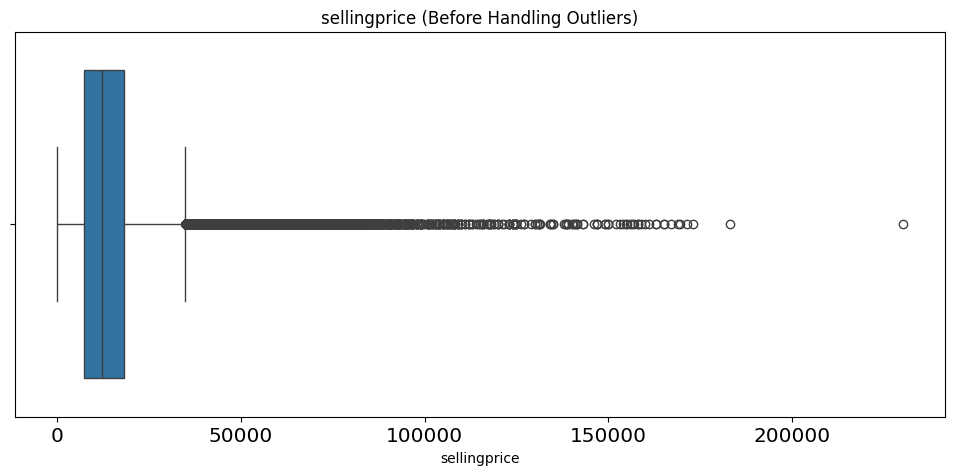

In [ ]:
# Visualize the distribution of the 'sellingprice' column before handling outliers
sns.boxplot(x=df['sellingprice'])
plt.title('sellingprice (Before Handling Outliers)')

Text(0.5, 1.0, 'odometer (Before Handling Outliers)')

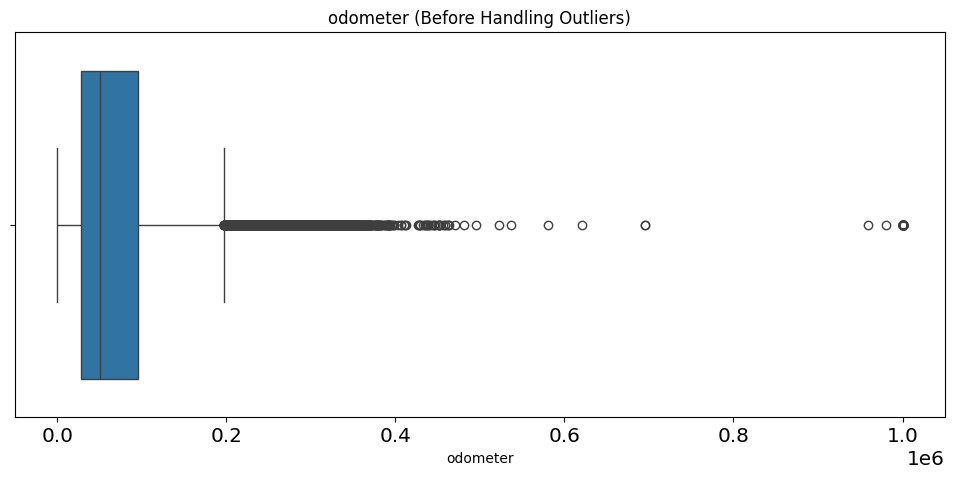

In [ ]:
# Visualize the distribution of the 'odometer' column before handling outliers
sns.boxplot(x=df['odometer'])
plt.title('odometer (Before Handling Outliers)')

In [ ]:
# Filter Outliers in 'odometer' and 'sellingprice' Columns
print(f'Number of rows before filtering outliers {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['odometer', 'sellingprice']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Number of rows after filtering outliers: {len(df)}')

Number of rows before filtering outliers 533657
Number of rows after filtering outliers: 506993


Text(0.5, 1.0, 'sellingprice (After Handling Outliers)')

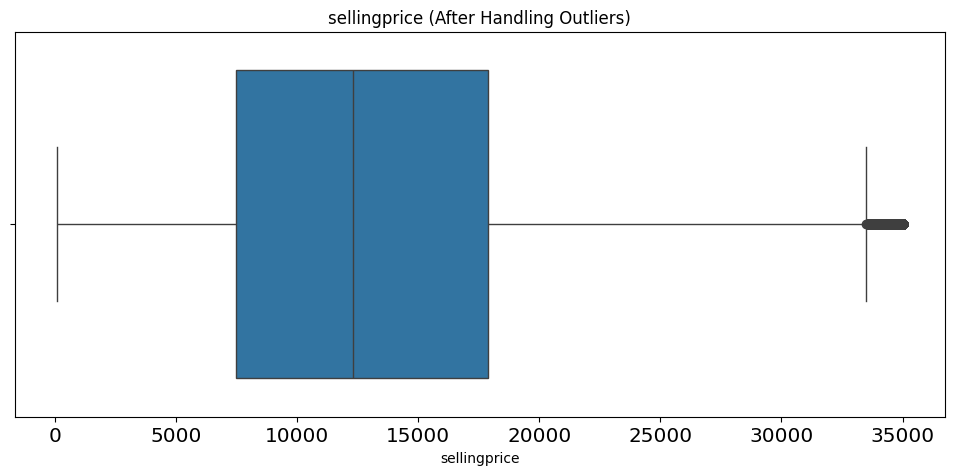

In [ ]:
# Visualize the distribution of the 'sellingprice' column after handling outliers
sns.boxplot(x=df['sellingprice'])
plt.title('sellingprice (After Handling Outliers)')

Text(0.5, 1.0, 'odometer (After Handling Outliers)')

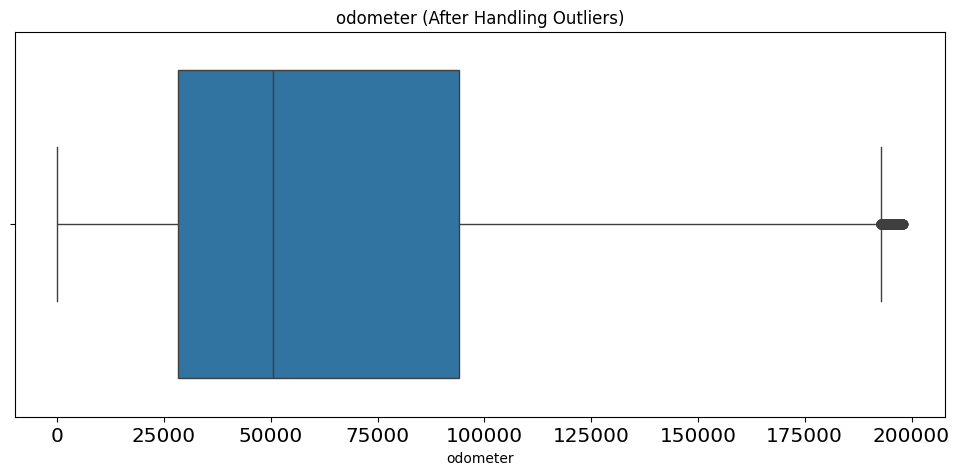

In [ ]:
# Visualize the distribution of the 'odometer' column after handling outliers
sns.boxplot(x=df['odometer'])
plt.title('odometer (After Handling Outliers)')

## Feature Transformation

In [ ]:
df.describe()

,year,condition,odometer,sellingprice
count,506993.000000,506993.000000,506993.000000,506993.000000
mean,2010.299556,3.435053,63887.029415,13120.613036
std,3.693058,0.932121,45295.090504,7635.078041
min,1990.000000,1.000000,1.000000,100.000000
25%,2008.000000,2.700000,28326.000000,7500.000000
50%,2012.000000,3.600000,50484.000000,12300.000000
75%,2013.000000,4.200000,94104.000000,17900.000000
max,2015.000000,5.000000,197911.000000,35000.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize 'year' and 'odometer' columns to [0,1] using Min-Max scaling
df['year_norm'] = MinMaxScaler().fit_transform(df['year'].values.reshape(len(df), 1))
df['odometer_norm'] = MinMaxScaler().fit_transform(df['odometer'].values.reshape(len(df), 1))

# Standardize 'sellingprice' and 'condition' columns for a normal distribution
df['sellingprice_std'] = StandardScaler().fit_transform(df['sellingprice'].values.reshape(len(df), 1))
df['condition_std'] = StandardScaler().fit_transform(df['condition'].values.reshape(len(df), 1))

In [ ]:
df.describe()

,year,condition,odometer,sellingprice,year_norm,odometer_norm,sellingprice_std,condition_std
count,506993.000000,506993.000000,506993.000000,506993.000000,506993.000000,506993.000000,5.069930e+05,5.069930e+05
mean,2010.299556,3.435053,63887.029415,13120.613036,0.811982,0.322803,9.776755e-17,6.883530e-16
std,3.693058,0.932121,45295.090504,7635.078041,0.147722,0.228867,1.000001e+00,1.000001e+00
min,1990.000000,1.000000,1.000000,100.000000,0.000000,0.000000,-1.705369e+00,-2.612380e+00
25%,2008.000000,2.700000,28326.000000,7500.000000,0.720000,0.143121,-7.361573e-01,-7.885812e-01
50%,2012.000000,3.600000,50484.000000,12300.000000,0.880000,0.255081,-1.074794e-01,1.769591e-01
75%,2013.000000,4.200000,94104.000000,17900.000000,0.920000,0.475484,6.259781e-01,8.206527e-01
max,2015.000000,5.000000,197911.000000,35000.000000,1.000000,1.000000,2.865643e+00,1.678911e+00


## Feature Encoding

In [ ]:
categorical_update

['make', 'model', 'trim', 'body', 'transmission', 'color', 'saledate']

In [ ]:
# Iterate through each column in 'categorical_update', print value counts
for col in categorical_update:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column make
make
ford             88313
chevrolet        55454
nissan           52380
toyota           37149
dodge            29412
honda            25059
hyundai          21260
kia              17745
bmw              16830
chrysler         16719
infiniti         14508
mercedes-benz    14445
jeep             14408
volkswagen       12049
lexus            10536
gmc               9439
mazda             8062
cadillac          6668
acura             5390
lincoln           5350
audi              4875
subaru            4861
buick             4824
pontiac           4066
mitsubishi        3926
ram               3914
volvo             3531
mini              3165
saturn            2552
mercury           1812
scion             1626
jaguar            1093
suzuki            1014
land rover         974
fiat               857
hummer             764
porsche            570
saab               445
smart              389
oldsmobile         301
isuzu              171
maserati            56
p

### Encoding strategy:
- `transmission`, `make`, `model`, `trim`, `body`, `color`: label encoding

In [ ]:
# Map 'transmission' values to numerical labels in 'df'
mapping_transmission = {
    'manual' : 0,
    'automatic' : 1
}
df['transmission_label'] = df['transmission'].map(mapping_transmission)

In [ ]:
# Display the count of the top 10 most common values in make
df['top_10_make'].value_counts(ascending = False)

top_10_make
others       163391
ford          88313
chevrolet     55454
nissan        52380
toyota        37149
dodge         29412
honda         25059
hyundai       21260
kia           17745
bmw           16830
Name: count, dtype: int64

In [ ]:
# Mapping the 'top_10_make' column to numerical labels for specific car brands
mapping_make = {
    'bmw': 0,
    'kia': 1,
    'hyundai': 2,
    'honda': 3,
    'dodge': 4,
    'toyota': 5,
    'nissan': 6,
    'chevrolet': 7,
    'ford': 8,
    'others': 9
}
df['make_label'] = df['top_10_make'].map(mapping_make)

In [ ]:
df['body'].value_counts(ascending = False)

body
sedan          236173
suv            130887
cab             33592
van             30130
hatchback       25402
coupe           17855
wagon           15440
convertible      9435
others           8079
Name: count, dtype: int64

In [ ]:
# Map categorical 'body' values to numerical labels and create a new 'body_label' column in DataFrame 'df'
mapping_body = {
    'others': 0,
    'convertible': 1,
    'wagon': 2,
    'coupe': 3,
    'hatchback': 4,
    'van': 5,
    'cab': 6,
    'suv': 7,
    'sedan': 8
}
df['body_label'] = df['body'].map(mapping_body)

In [ ]:
df['top_10_color'].value_counts(ascending = False)

top_10_color
black       99872
white       95513
gray        76847
silver      76619
blue        46756
others      43751
red         40061
gold         9841
green        9566
burgundy     8167
Name: count, dtype: int64

In [ ]:
# Map color names to numerical labels for the 'top_10_color' column in the DataFrame 'df'
mapping_color = {
    'burgundy': 0,
    'green': 1,
    'gold': 2,
    'red': 3,
    'others': 4,
    'blue': 5,
    'silver': 6,
    'gray': 7,
    'white': 8,
    'black': 9
}
df['color_label']  = df['top_10_color'].map(mapping_color)

In [ ]:
df['top_10_model'].value_counts(ascending = False)

top_10_model
others           404927
altima            18973
f-150             13094
fusion            12813
camry             11852
escape            11624
focus             10181
accord             8258
grand caravan      7725
3 series           7546
Name: count, dtype: int64

In [ ]:
# Map 'top_10_model' values to numerical labels using a predefined mapping model
mapping_model = {
    '3 series': 0,
    'grand caravan': 1,
    'accord': 2,
    'focus': 3,
    'escape': 4,
    'camry': 5,
    'fusion': 6,
    'f-150': 7,
    'altima': 8,
    'others': 9
}
df['model_label'] = df['top_10_model'].map(mapping_model)

In [ ]:
df['top_10_trim'].value_counts(ascending = False)

top_10_trim
others     308515
base        50188
se          42570
lx          19885
limited     17273
lt          16009
xlt         15700
ls          12470
le          12306
gls         12077
Name: count, dtype: int64

In [ ]:
# Mapping of 'top_10_trim' values to numerical labels for categorization
mapping_trim = {
    'gls': 0,
    'le': 1,
    'ls': 2,
    'xlt': 3,
    'lt': 4,
    'limited': 5,
    'lx': 6,
    'se': 7,
    'base': 8,
    'others': 9
}

df['trim_label'] = df['top_10_trim'].map(mapping_trim)

In [ ]:
df.head(2)

,year,make,model,trim,body,transmission,condition,odometer,color,sellingprice,...,year_norm,odometer_norm,sellingprice_std,condition_std,transmission_label,make_label,body_label,color_label,model_label,trim_label
0,2015,kia,sorento,lx,suv,automatic,5.0,16639.0,white,21500,...,1.0,0.084069,1.097487,1.678911,1,1,7,8,9,6
1,2015,kia,sorento,lx,suv,automatic,5.0,9393.0,white,21500,...,1.0,0.047456,1.097487,1.678911,1,1,7,8,9,6


In [ ]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'sellingprice', 'saledate', 'top_10_make',
       'top_10_model', 'top_10_trim', 'top_10_color', 'year_norm',
       'odometer_norm', 'sellingprice_std', 'condition_std',
       'transmission_label', 'make_label', 'body_label', 'color_label',
       'model_label', 'trim_label'],
      dtype='object')

### Handle Class Imbalance

There is no need to handle class imbalance because our dataset has a `sellingprice` target in the form of a regression. In determining car prices, the data is a continuous variable so there will be no imbalance.

# **PHASE 3: Feature Engineering**

## Feature Selection

- Columns `mmr`, `state`, `vin`, `interior`, and `seller` dropped.

## Feature Extraction

In [ ]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'sellingprice', 'saledate', 'top_10_make',
       'top_10_model', 'top_10_trim', 'top_10_color', 'year_norm',
       'odometer_norm', 'sellingprice_std', 'condition_std',
       'transmission_label', 'make_label', 'body_label', 'color_label',
       'model_label', 'trim_label'],
      dtype='object')

- Feature extraction columns include `top_10_make`, `top_10_model`, `top_10_trim`, `year_norm`, `odometer_norm`, `sellingprice_std`, `condition_std`, `transmission_label`, `make_label`, `body_label`, `top_10_color`, `color_label`, `model_label`, `trim_label`.

## Supervised Learning

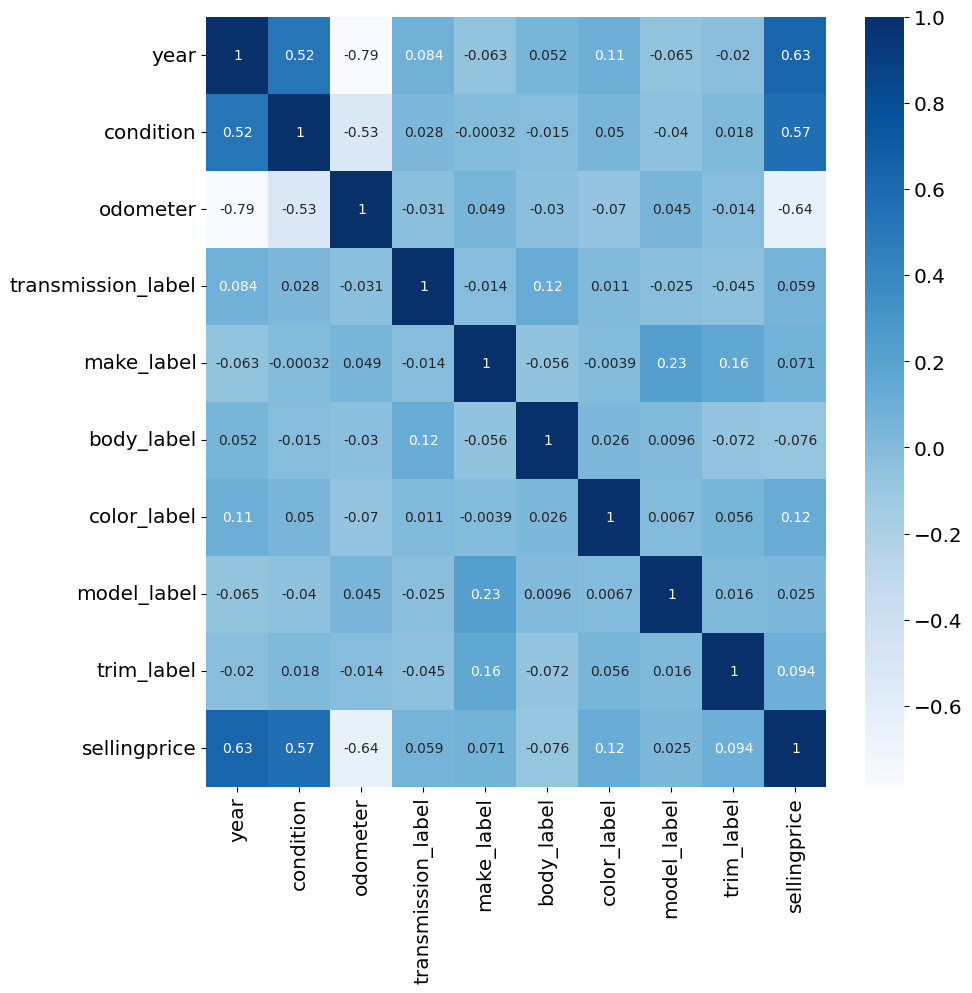

In [ ]:
plt.figure(figsize=(10, 10))
test = sns.heatmap(df[['year', 'condition', 'odometer', 'transmission_label', 'make_label', 'body_label', 'color_label', 'model_label', 'trim_label', 'sellingprice']].corr(), cmap='Blues', annot=True)

### Datasets generation

In [ ]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'sellingprice', 'saledate', 'top_10_make',
       'top_10_model', 'top_10_trim', 'top_10_color', 'year_norm',
       'odometer_norm', 'sellingprice_std', 'condition_std',
       'transmission_label', 'make_label', 'body_label', 'color_label',
       'model_label', 'trim_label'],
      dtype='object')

In [ ]:
# Selecting specific columns from the DataFrame for feature (X) and target (y) variables
X = df[['year', 'condition', 'odometer', 'transmission_label', 'make_label', 'body_label', 'color_label', 'model_label', 'trim_label']].copy()
y = df[['sellingprice']].copy()

In [ ]:
# Split the data into training, validating and testing sets
from sklearn.model_selection import train_test_split

# Define the size for each set
train_size = 0.64
validation_size = 0.16
test_size = 0.20

# Split the data into a training set and a temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1 - train_size), random_state=42)

# Split the temporary set into validation and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X_temp, y_temp, test_size=(test_size / (validation_size + test_size)), random_state=42)

# Split the temporary set into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=(validation_size / (validation_size + test_size)), random_state=42)

# Print the sizes of the sets
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

X_train_validation = pd.concat([X_train, X_val])
Y_train_validation = pd.concat([y_train, y_val])


Train set size: 45066
Validation set size: 36053
Test set size: 101399


In [ ]:
X_train.head()

,year,condition,odometer,transmission_label,make_label,body_label,color_label,model_label,trim_label
91220,2008,3.1,93652.0,1,9,2,8,9,8
303566,2008,1.9,124889.0,1,9,8,8,9,8
73258,2014,2.5,9945.0,1,9,8,8,9,9
11359,2011,3.9,37447.0,1,5,2,9,9,8
203118,2011,4.3,43723.0,1,6,7,6,9,9


In [ ]:
X_test.head()

,year,condition,odometer,transmission_label,make_label,body_label,color_label,model_label,trim_label
274593,2011,4.9,27539.0,1,8,0,9,7,3
358337,2012,3.4,26461.0,1,9,7,9,9,9
407268,2003,1.9,111073.0,1,6,7,7,9,9
336238,2013,2.3,78419.0,1,7,8,5,9,2
97645,2012,4.1,60852.0,1,7,8,9,9,9


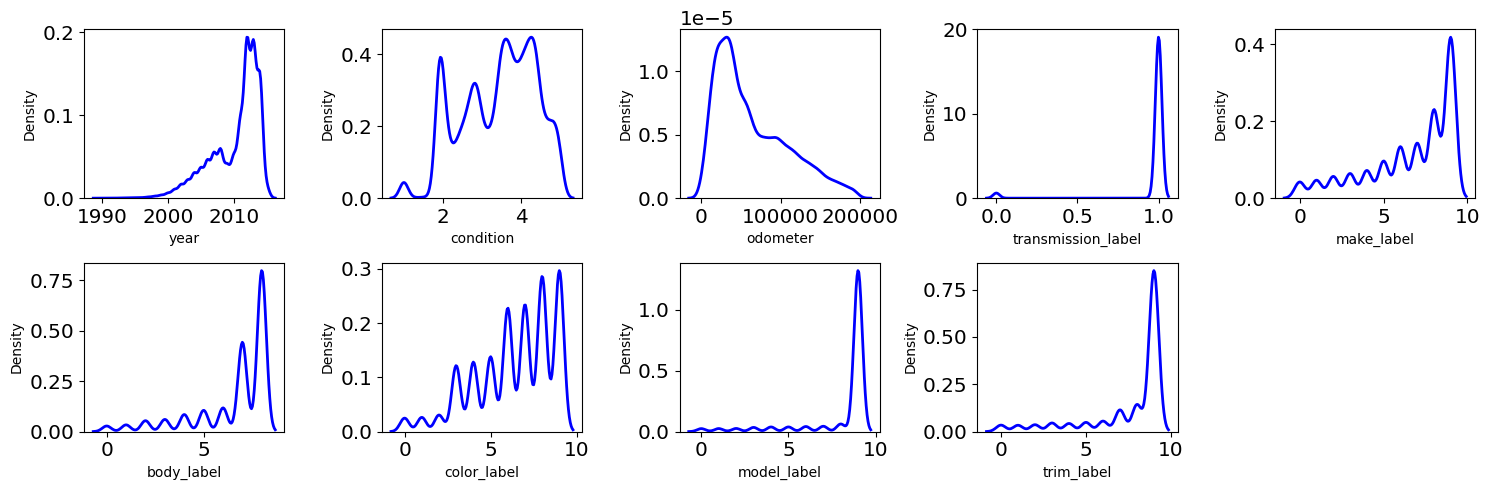

In [ ]:
# Visualize Kernel Density Estimation (KDE) plots for features in X_train
plt.figure(figsize=(15, 5))
for i in range(0, len(X_train.columns)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x = X_train[X_train.columns[i]], color = 'blue')
    plt.tight_layout()

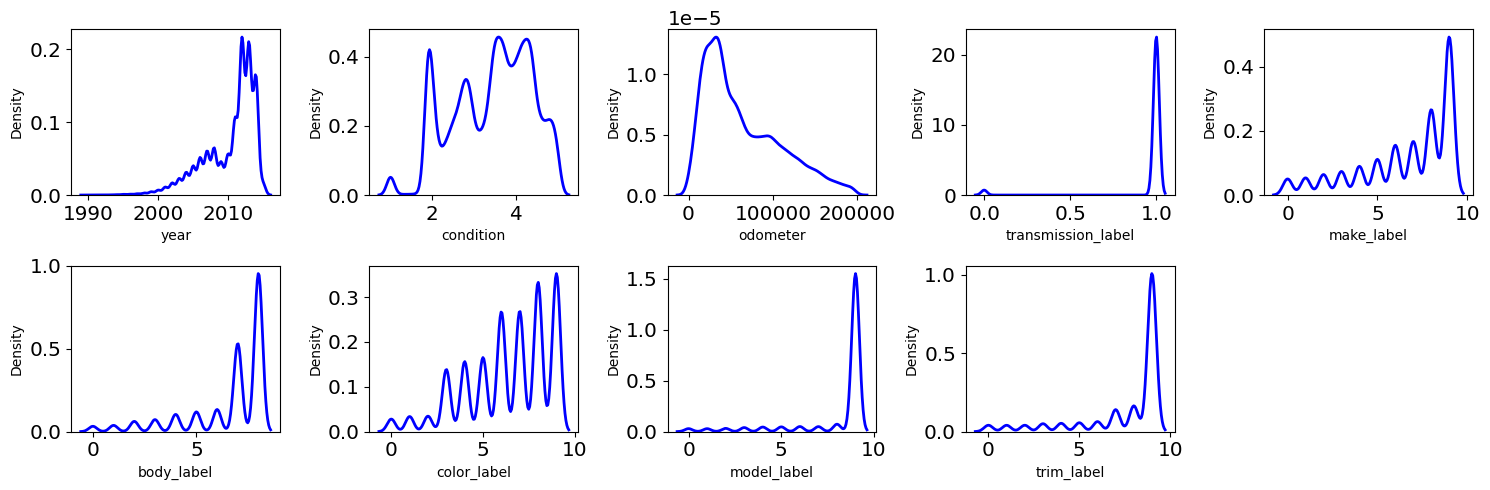

In [ ]:
# Visualize Kernel Density Estimation (KDE) plots for features in X_test
plt.figure(figsize=(15, 5))
for i in range(0, len(X_test.columns)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x = X_test[X_test.columns[i]], color = 'blue')
    plt.tight_layout()

In [ ]:
# Create a function to make it easier to try various algorithms

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def test_metrics_evaluation(model, y_pred, X_train, X_test, y_train, y_test):
  print('RMSE: '+ str(mean_squared_error(y_test, y_pred, squared = False)))
  print('MAE: '+ str(mean_absolute_error(y_test, y_pred)))
  print('R2: '+ str(r2_score(y_test, y_pred)))

def train_metrics_evaluation(model, y_pred_train, X_train, X_test, y_train, y_test):
  print('RMSE: '+ str(mean_squared_error(y_train, y_pred_train, squared = False)))
  print('MAE: '+ str(mean_absolute_error(y_train, y_pred_train)))
  print('R2: '+ str(r2_score(y_train, y_pred_train)))

def show_feature_importance(model):
  feature_importance = pd.Series(model.feature_importances_, index=X.columns)
  ax = feature_importance.nlargest(25).plot(kind='barh', figsize=(10,8))
  ax.invert_yaxis()
  plt.xlabel('Score')
  plt.ylabel('Features')
  plt.title('Feature Importance Score')

def show_best_hyperparameter(model, hyperparameters):
  for key, value in hyperparameters.items():
    print('Best '+key+':', model.get_params()[key])

# **PHASE 4: Modeling**

## Random Forest

In [ ]:
# Create a Random Forest Regressor model with a fixed random state 77
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=77)
rf.fit(X_train, y_train)

c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=77)

In [ ]:
# Making predictions using the Random Forest model
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

#### Model Evaluation (Selection and Calculation of Metrics)

In [ ]:
# Test
test_metrics_evaluation(rf, y_pred, X_train, X_test, y_train, y_test)

RMSE: 3557.4109919931943
MAE: 2422.865263464137
R2: 0.7825385843426459


In [ ]:
# Train
train_metrics_evaluation(rf, y_pred_train, X_train, X_test, y_train, y_test)

RMSE: 1329.1779333510628
MAE: 897.880084320774
R2: 0.9700320522847795


#### Model Evaluation (Is the Model Best Fit?)

In [ ]:
print('Train Accuracy: ', rf.score(X_train, y_train))
print('Test Accuracy: ', rf.score(X_test, y_test))

Train Accuracy:  0.9700320522847795
Test Accuracy:  0.7825385843426459


The `Random Forest` algorithm model shows training score > testing score, but the distance is not too far.

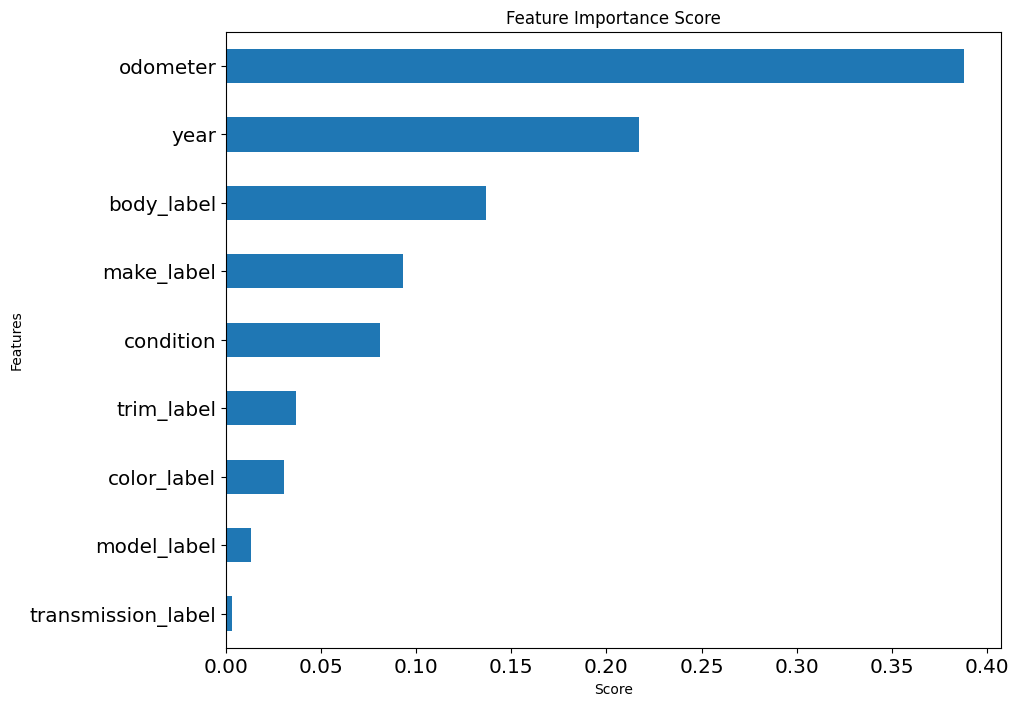

In [ ]:
show_feature_importance(rf)

#### Tuning Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [15]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
hyperparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Init
rf = RandomForestRegressor(random_state=77)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=77, n_iter=15, scoring='r2')
rf_tuned.fit(X_train, y_train)
# Predict & Evaluation
pred = rf_tuned.predict(X_test)
test_metrics_evaluation(rf_tuned, pred, X_train, y_train, X_test, y_test)

c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed

RMSE: 3540.0970362102594
MAE: 2425.477089078553
R2: 0.7846502070431417


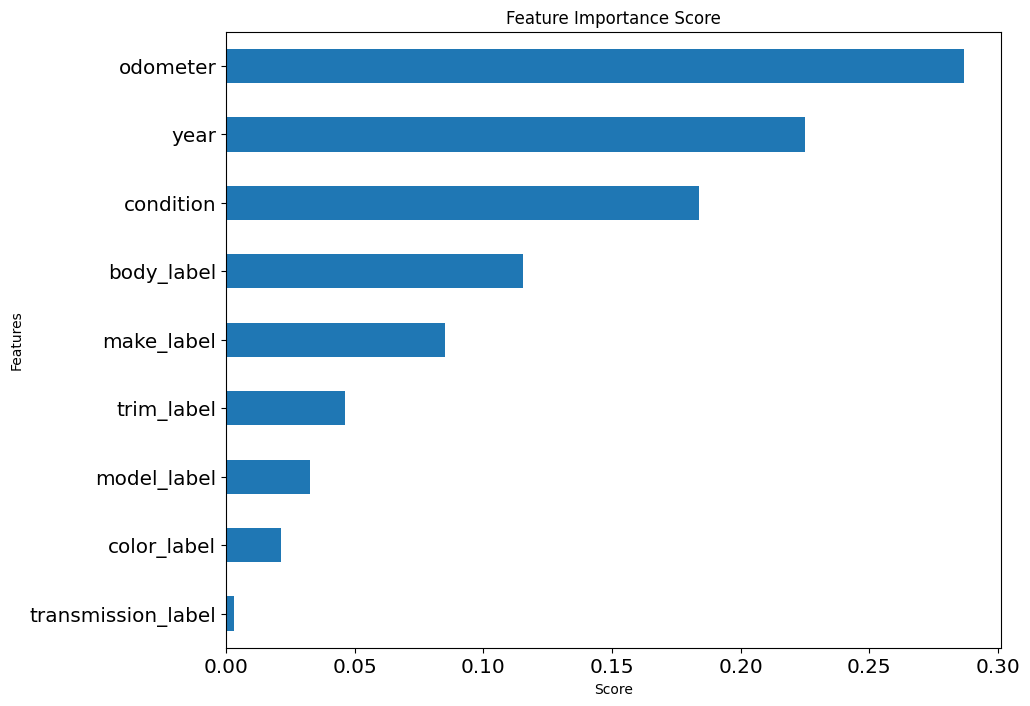

In [ ]:
show_feature_importance(rf_tuned.best_estimator_)

In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 15
Best max_features: sqrt
Best max_depth: None
Best min_samples_split: 10
Best min_samples_leaf: 1
Best bootstrap: False


In [ ]:
print('Train score: ' + str(rf_tuned.score(X_train, y_train)))
print('Test score:' + str(rf_tuned.score(X_test, y_test)))

Train score: 0.9336782991101619


Test score:0.7846502070431417


## Neural Network

In [ ]:
print(f"The number of neurons for the input layer must be: {X_train.shape[1]}")

The number of neurons for the input layer must be: 9


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# define the neural network model class instance
simple_nn = Sequential()

# add the first input layer with 9 nodes and the first hidden layer, with  relu activation function
# note that the first command does two things: create a first input layer with 9 nodes, and then a hidden layer
# we set the number of neurons to be equal to the (# of nodes in the input layer + # neurons in the output layer)/2,
# i.e. the mean of the number of neurons in the input layer and the output layer. This is usually a good heuristic to get started.
simple_nn.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))

# Add the second hidden layer with 4 nodes and ReLU activation
simple_nn.add(Dense(4, activation='relu'))

# add the output layer with sigmoid function (the sigmoid function is exactly the same as that used in the formulation of logisitc regression
simple_nn.add(Dense(1, activation='linear'))


In [ ]:
from keras.losses import Huber
from keras.optimizers import Adam

simple_nn.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

In [ ]:
simple_nn.fit(X_train, y_train, epochs=100, batch_size = 50)

Epoch 1/100


902/902 [==============================] - 4s 3ms/step - loss: 155007024.0000
Epoch 2/100
902/902 [==============================] - 2s 3ms/step - loss: 35675072.0000
Epoch 3/100
902/902 [==============================] - 2s 2ms/step - loss: 33600088.0000
Epoch 4/100
902/902 [==============================] - 2s 2ms/step - loss: 33468156.0000
Epoch 5/100
902/902 [==============================] - 2s 2ms/step - loss: 33416420.0000
Epoch 6/100
902/902 [==============================] - 2s 2ms/step - loss: 33341600.0000
Epoch 7/100
902/902 [==============================] - 2s 2ms/step - loss: 33328948.0000
Epoch 8/100
902/902 [==============================] - 2s 2ms/step - loss: 33293336.0000
Epoch 9/100
902/902 [==============================] - 2s 2ms/step - loss: 33249266.0000
Epoch 10/100
902/902 [==============================] - 2s 2ms/step - loss: 33225342.0000
Epoch 11/100
902/902 [==============================] - 2s 2ms/step - loss: 33179002.0000
Epoch 12/100
902/902 [========

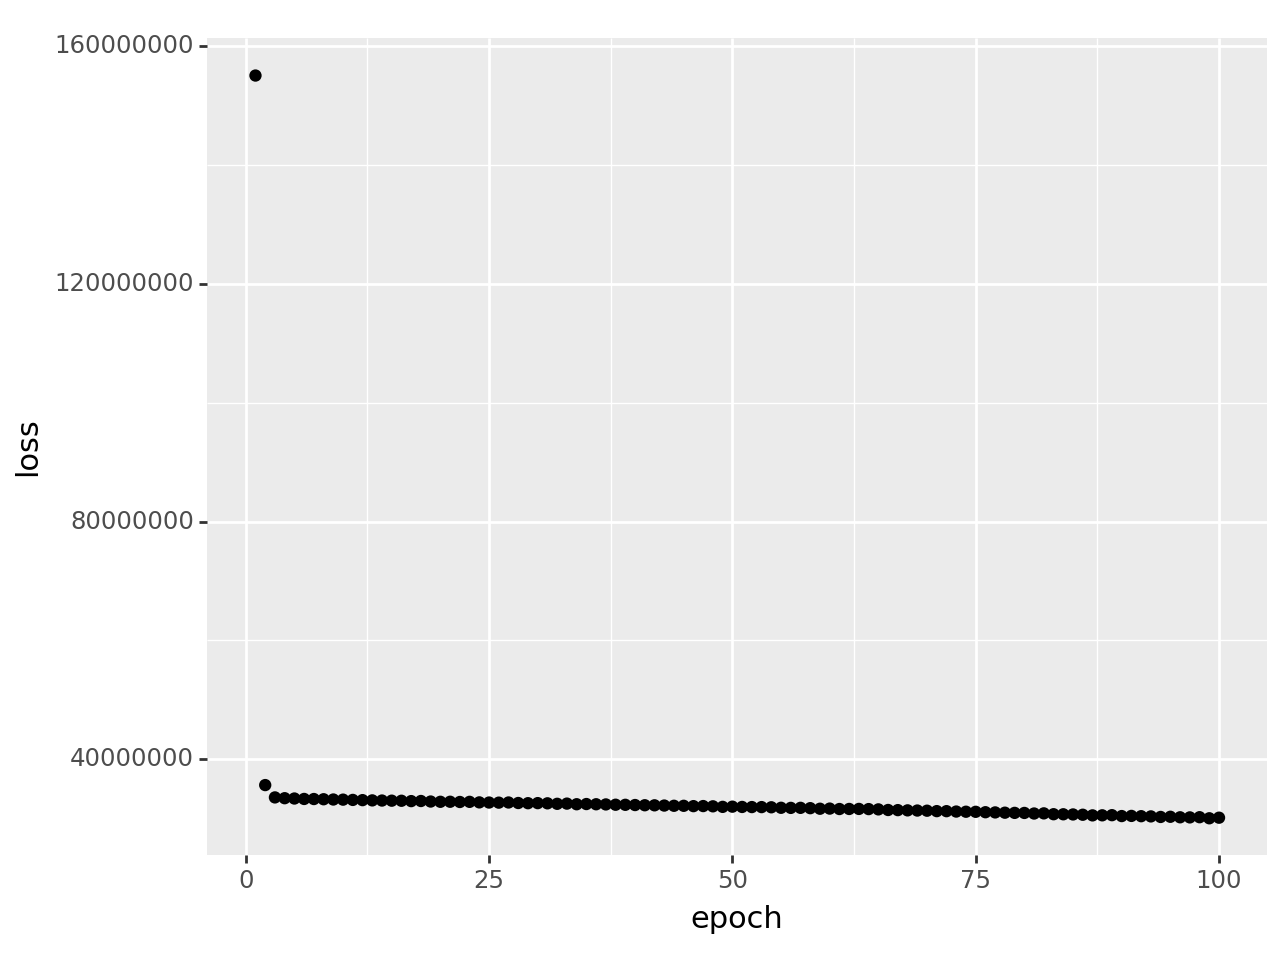

<Figure Size: (640 x 480)>

In [ ]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point

# see what information has been logged during the training process
simple_nn.history.history.keys()

# plot the training loss over epochs
loss_df = pd.DataFrame(simple_nn.history.history['loss'])
loss_df.columns = ['loss']
loss_df = loss_df.assign(epoch = np.arange(1, 101))

(
    ggplot(loss_df, aes(x='epoch', y='loss')) +
    geom_point()
)

In [ ]:
simple_nn.fit(X_train, y_train, epochs=100, batch_size = 50, validation_data= (X_val, y_val))

Epoch 1/100
 37/902 [>.............................] - ETA: 2s - loss: 29594302.0000

902/902 [==============================] - 4s 4ms/step - loss: 30060272.0000 - val_loss: 29938280.0000
Epoch 2/100
902/902 [==============================] - 4s 5ms/step - loss: 30159078.0000 - val_loss: 29887636.0000
Epoch 3/100
902/902 [==============================] - 4s 4ms/step - loss: 30046766.0000 - val_loss: 29817254.0000
Epoch 4/100
902/902 [==============================] - 3s 3ms/step - loss: 30038320.0000 - val_loss: 29773052.0000
Epoch 5/100
902/902 [==============================] - 3s 3ms/step - loss: 29973088.0000 - val_loss: 29735506.0000
Epoch 6/100
902/902 [==============================] - 4s 4ms/step - loss: 29962436.0000 - val_loss: 29718694.0000
Epoch 7/100
902/902 [==============================] - 4s 5ms/step - loss: 29939104.0000 - val_loss: 30403582.0000
Epoch 8/100
902/902 [==============================] - 4s 4ms/step - loss: 29897198.0000 - val_loss: 29676740.0000
Epoch 9/100
902/902 [==============================] - 3s 4ms/step - loss: 29887298.0000 - v

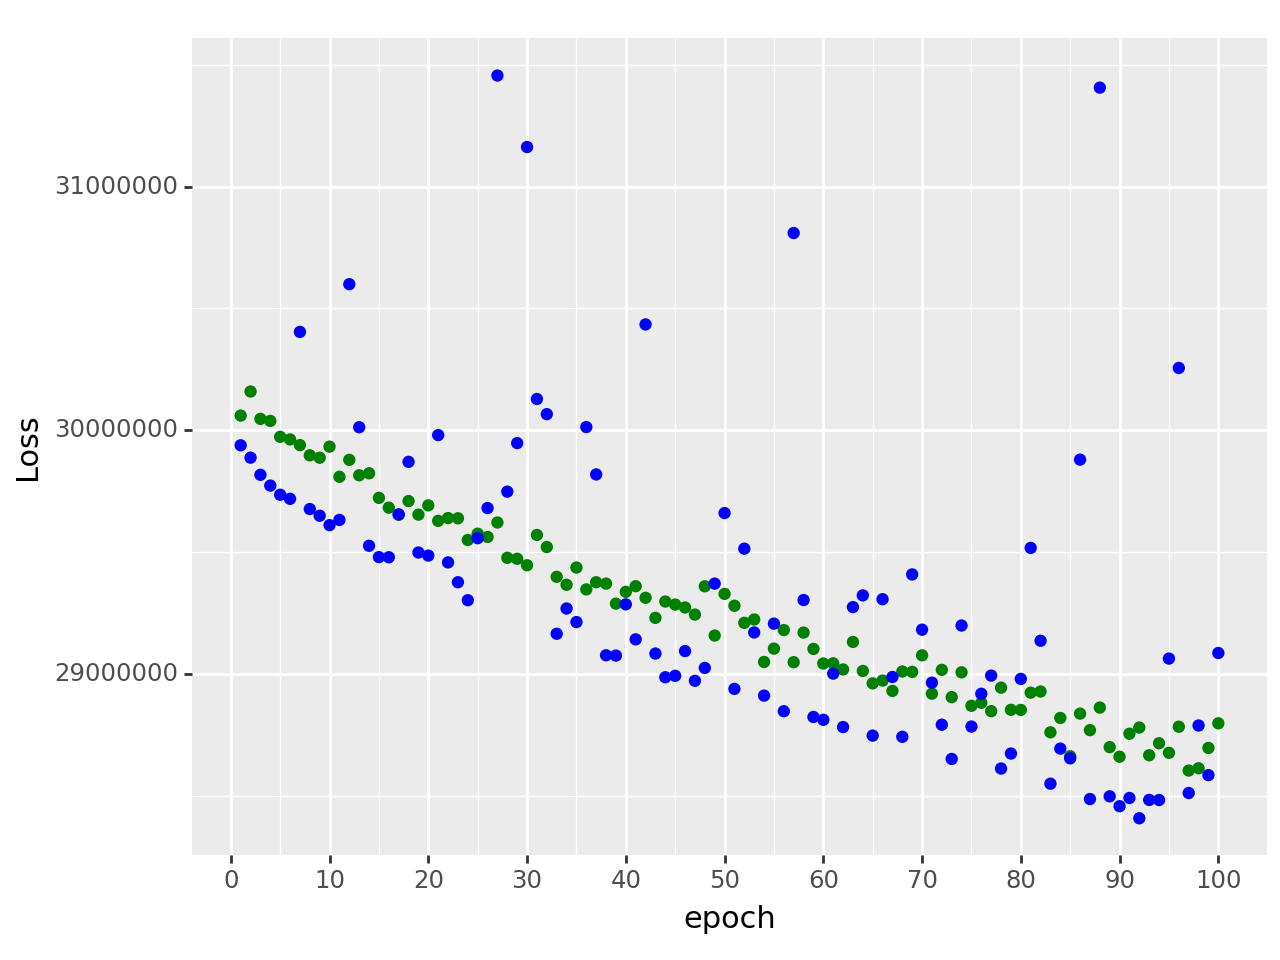

<Figure Size: (640 x 480)>

In [ ]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab

# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, 101))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='blue') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn)

In [ ]:
import json

# save the above simple nn fitted model to look at it later. We need to use the keras save command
# this command will save all the components of the model, in particular the architecture and the weights
# note: it will NOT save the training history. This needs to be saved separately.
simple_nn.save('../dataset/simple_nn_model')

print("Storing the fitting history of simple nn to disk")
with open('../dataset/simple_nn_history.json', 'w') as handle:
    json.dump(simple_nn.history.history, handle)

INFO:tensorflow:Assets written to: ../dataset/simple_nn_model\assets


INFO:tensorflow:Assets written to: ../dataset/simple_nn_model\assets


Storing the fitting history of simple nn to disk


In [ ]:
import json
from tensorflow import keras

# we can load the above save model like this:
simple_nn = keras.models.load_model("../dataset/simple_nn_model")
simple_nn

# reload the fitting history like this
with open("../dataset/simple_nn_history.json", "r") as handle:
    simple_nn_history = json.load(handle)

In [ ]:
final_nn = Sequential()
final_nn.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
final_nn.add(Dense(1, activation='relu'))
final_nn.compile(loss='mean_squared_error', optimizer='adam')
final_nn.fit(X_train_validation, Y_train_validation, epochs=100, batch_size = 100, verbose=0)
y_hat_test_nn = final_nn.predict(X_test)
y_hat_test_nn = np.where(y_hat_test_nn >= 0.5, 1, 0)

3169/3169 [==============================] - 6s 2ms/step


In [ ]:
oversized_nn = Sequential()
oversized_nn.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
oversized_nn.add(Dense(4, activation='relu'))
oversized_nn.add(Dense(2, activation='relu'))
oversized_nn.add(Dense(1, activation='linear'))
oversized_nn.compile(loss="mean_squared_error", optimizer="adam")
oversized_nn.fit(X_train, y_train, epochs=100, batch_size = 100, validation_data=(X_val, y_val))

Epoch 1/100


451/451 [==============================] - 4s 6ms/step - loss: 166882576.0000 - val_loss: 163062576.0000
Epoch 2/100
451/451 [==============================] - 2s 5ms/step - loss: 140641824.0000 - val_loss: 74861792.0000
Epoch 3/100
451/451 [==============================] - 2s 4ms/step - loss: 44437864.0000 - val_loss: 36179148.0000
Epoch 4/100
451/451 [==============================] - 2s 4ms/step - loss: 34873168.0000 - val_loss: 34512016.0000
Epoch 5/100
451/451 [==============================] - 2s 3ms/step - loss: 34228092.0000 - val_loss: 34092112.0000
Epoch 6/100
451/451 [==============================] - 2s 4ms/step - loss: 34042380.0000 - val_loss: 33979992.0000
Epoch 7/100
451/451 [==============================] - 2s 4ms/step - loss: 33924872.0000 - val_loss: 33798312.0000
Epoch 8/100
451/451 [==============================] - 2s 5ms/step - loss: 33934160.0000 - val_loss: 33973156.0000
Epoch 9/100
451/451 [==============================] - 2s 5ms/step - loss: 33839056.0000 

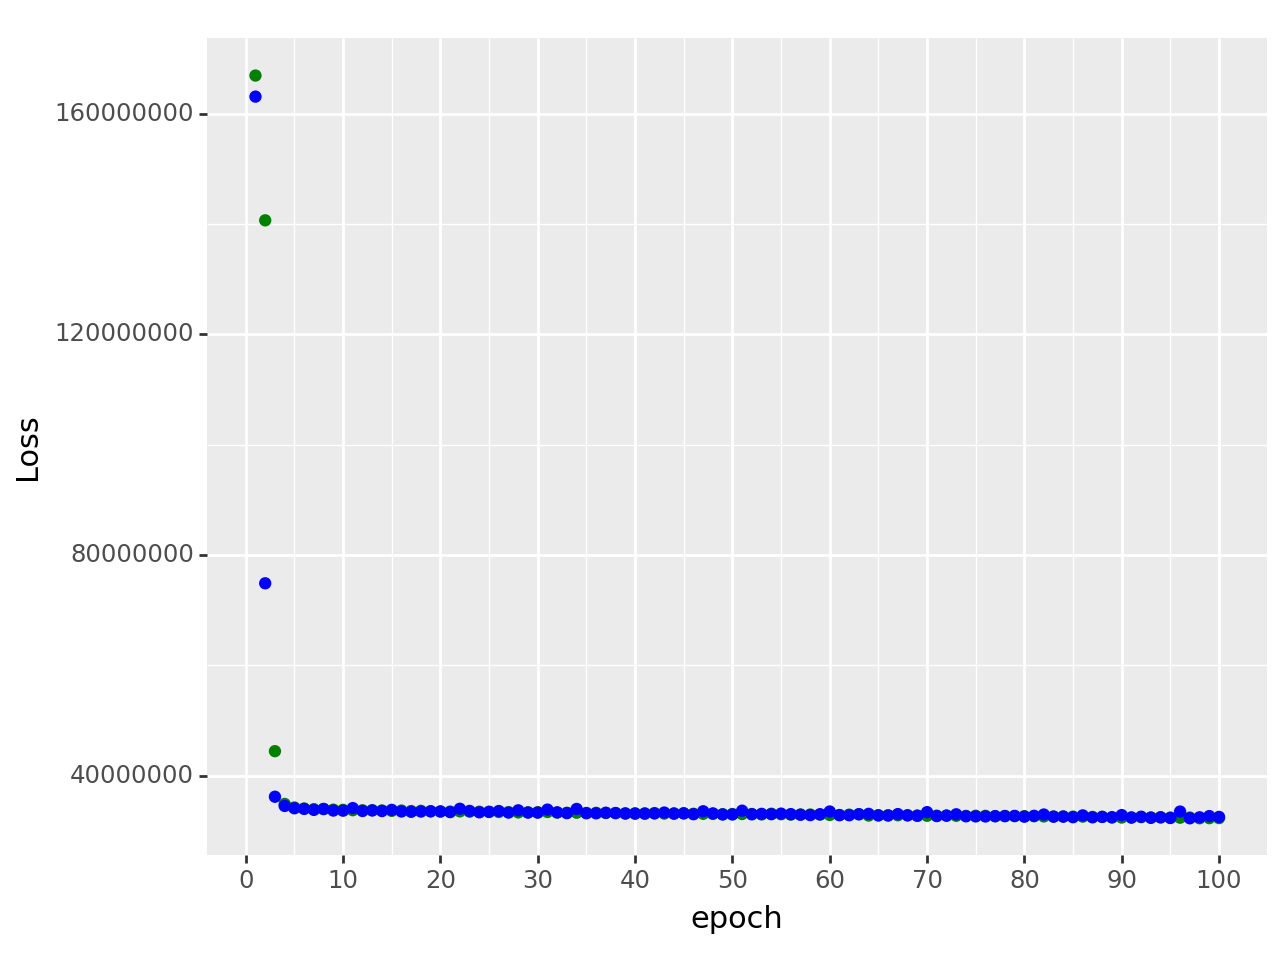

<Figure Size: (640 x 480)>

In [ ]:
plot_loss(oversized_nn)

#### Tuning Hyperparameter

In [ ]:
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_val)

# Define the neural network model
model = MLPRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (5, 5), (10, 5)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [50, 100, 200],  # Added max_iter as the number of epochs
}

# Create a GridSearchCV object
grid_search_nn = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_nn.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search_nn.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model on the validation set
y_pred_validation = grid_search_nn.predict(X_validation_scaled)
mse_validation = mean_squared_error(y_val, y_pred_validation)
print("Mean Squared Error on Validation Set:", mse_validation)


We now train a model with the best parameters found on train and validation, together:

In [ ]:
#best_model = create_model(20)
#best_model.fit(X_train_validation, y_train_validation, epochs=100, batch_size=10, verbose=0)

We can then evaluate the model so trained on the test set:

## Bonus: Linear Regression

In [ ]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting target values for the test and train datasets
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [ ]:
# Display the coefficients and intercept of a linear regression model
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)

Coefficients: 
 [[ 5.55580880e+02  2.15319355e+03 -5.05711479e-02  1.50850570e+03
   2.28354982e+02 -3.55805559e+02  2.02192276e+02  1.87721680e+02
   2.17844288e+02]]
Intercept: 
 [-1112975.65082419]


In [ ]:
# Test Evaluation
test_metrics_evaluation(regressor, y_pred, X_train, X_test, y_train, y_test)

RMSE: 5203.461587403552
MAE: 4022.4426638131386
R2: 0.5347366628163458


In [ ]:
# Train evaluation
train_metrics_evaluation(regressor, y_pred_train, X_train, X_test, y_train, y_test)

RMSE: 5195.183174979568
MAE: 4015.1336150582283
R2: 0.5421823975913045


In [ ]:
# Evaluate the accuracy of a model on train and test data
print('Train Accuracy: ', regressor.score(X_train, y_train))
print('Test Accuracy: ', regressor.score(X_test, y_test))

Train Accuracy:  0.5421823975913045
Test Accuracy:  0.5347366628163458


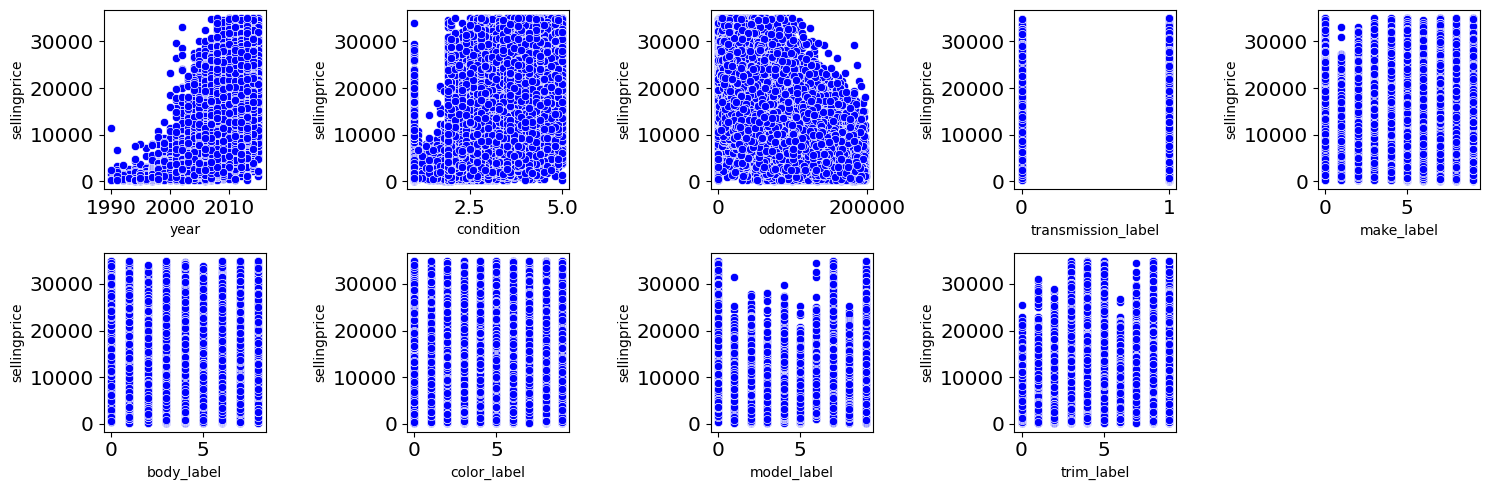

In [ ]:
# Visualize scatterplots of feature variables against the 'sellingprice'
plt.figure(figsize=(15, 5))
for i in range(0, len(X_test.columns)):
    plt.subplot(2, 5, i+1)
    sns.scatterplot(x=X_test[X_test.columns[i]], y=y_test['sellingprice'], color = 'blue')
    plt.tight_layout()

Observing the scatter plot of features against the target, the data is not linear.

## Bonus: Xgboost

pip install xgboost if needed !!!


In [ ]:
# Create an XGBoost Regressor model, set a random seed for reproducibility, and fit it to the training data.
from xgboost import XGBClassifier, XGBRegressor
xg = XGBRegressor(random_state=77)
xg.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Predicting target values using the trained XGBoost model
y_pred = xg.predict(X_test)
y_pred_train = xg.predict(X_train)

In [ ]:
# Test evaluation
test_metrics_evaluation(xg, y_pred, X_train, X_test, y_train, y_test)

RMSE: 3285.6333700596656
MAE: 2234.6203644259017
R2: 0.8148365610120865


In [ ]:
# Train evaluation
train_metrics_evaluation(xg, y_pred_train, X_train, X_test, y_train, y_test)

RMSE: 3244.5782537937266
MAE: 2208.8676497576676
R2: 0.8194012310581076


In [ ]:
# Evaluate and print the training and testing accuracy of the XGBoost model
print("Train Accuracy : ",xg.score(X_train,y_train))
print("Test Accuracy : ",xg.score(X_test,y_test))

Train Accuracy :  0.8194012310581076
Test Accuracy :  0.8148365610120865


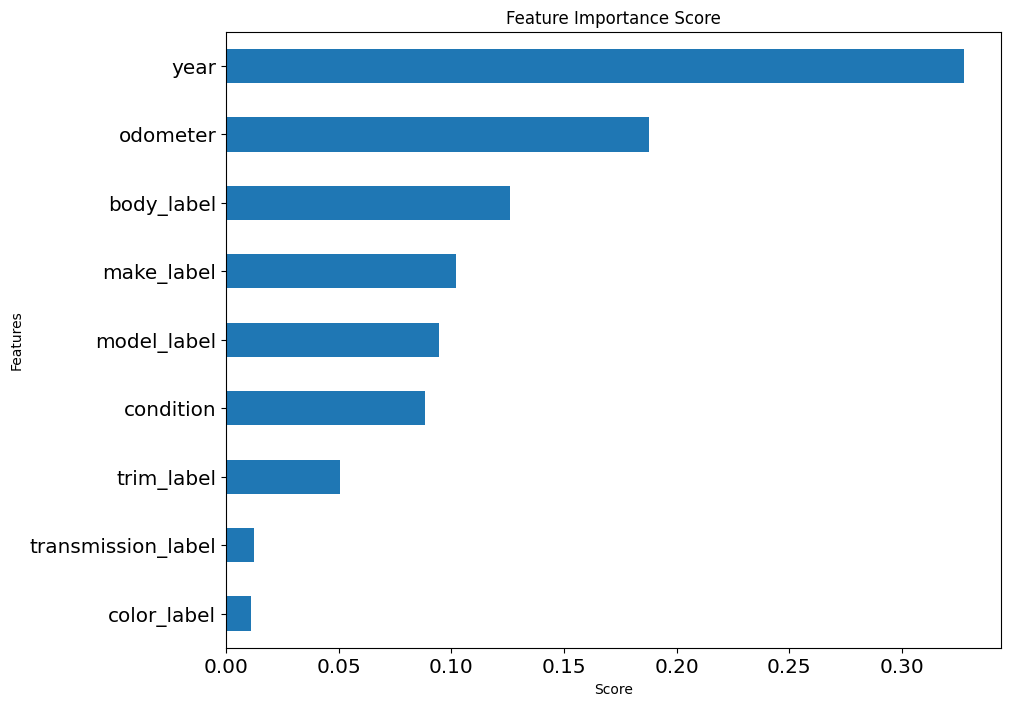

In [ ]:
# Visualize feature importance using the XGBoost model (xg)

show_feature_importance(xg)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# Hyperparameters tuning
hyperparameters = {'max_depth': [10],
                   'eta':[0.9],
                   'min_child_weight' :[1, 10, 100], 
                   'n_estimators' : [15],
                   'tree_method' : ['auto', 'exact', 'approx', 'hist']
                    }

# Init
xg = XGBRegressor(random_state=77)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=77, scoring='r2')
xg_tuned.fit(X_train,y_train)

# Prediction & Evaluation
y_pred = xg_tuned.predict(X_test)
test_metrics_evaluation(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

RMSE: 3342.9583578256693
MAE: 2279.405361609154
R2: 0.8083190424306183


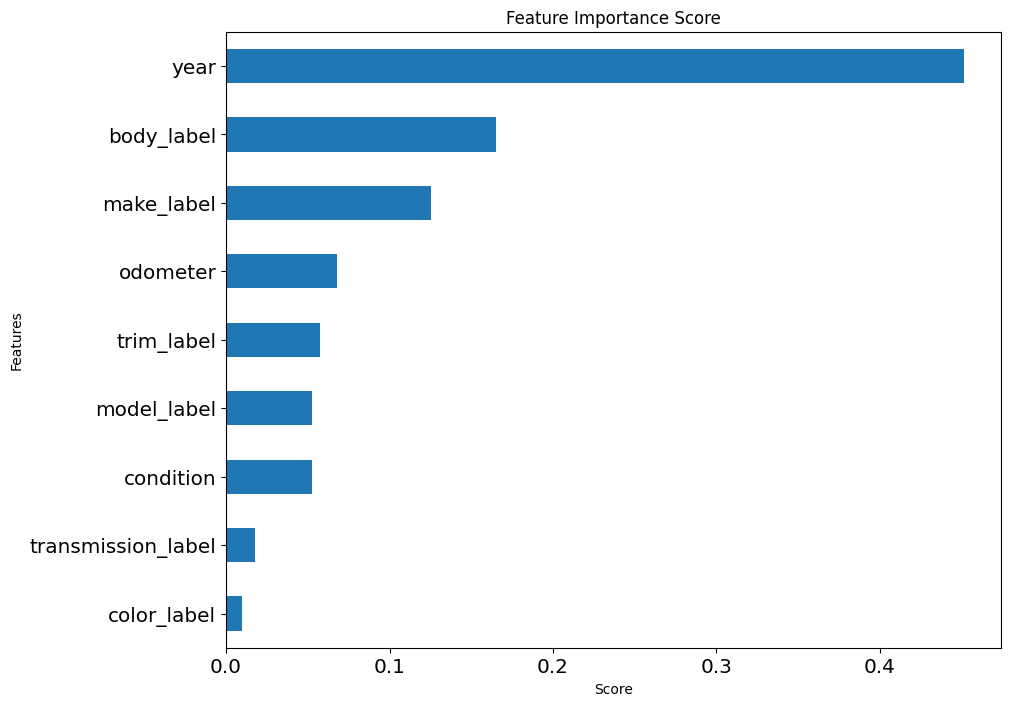

In [ ]:
# Visualize feature importance using the best estimator from a tuned XGBoost model
show_feature_importance(xg_tuned.best_estimator_)

In [ ]:
# Display the best hyperparameters for the XGBoost model
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 10
Best eta: 0.9
Best min_child_weight: 100
Best n_estimators: 15
Best tree_method: auto


In [ ]:
# Evaluate and print the training and testing accuracy of the tuned XGBoost model
print("Train Accuracy : ",xg_tuned.score(X_train,y_train))
print("Test Accuracy : ",xg_tuned.score(X_test,y_test))

Train Accuracy :  0.8216436605122555
Test Accuracy :  0.8083190424306183


# **PHASE 5: Model Selection**


# Explainability: Interpretation of Feature Selection

<Axes: xlabel='odometer', ylabel='sellingprice'>

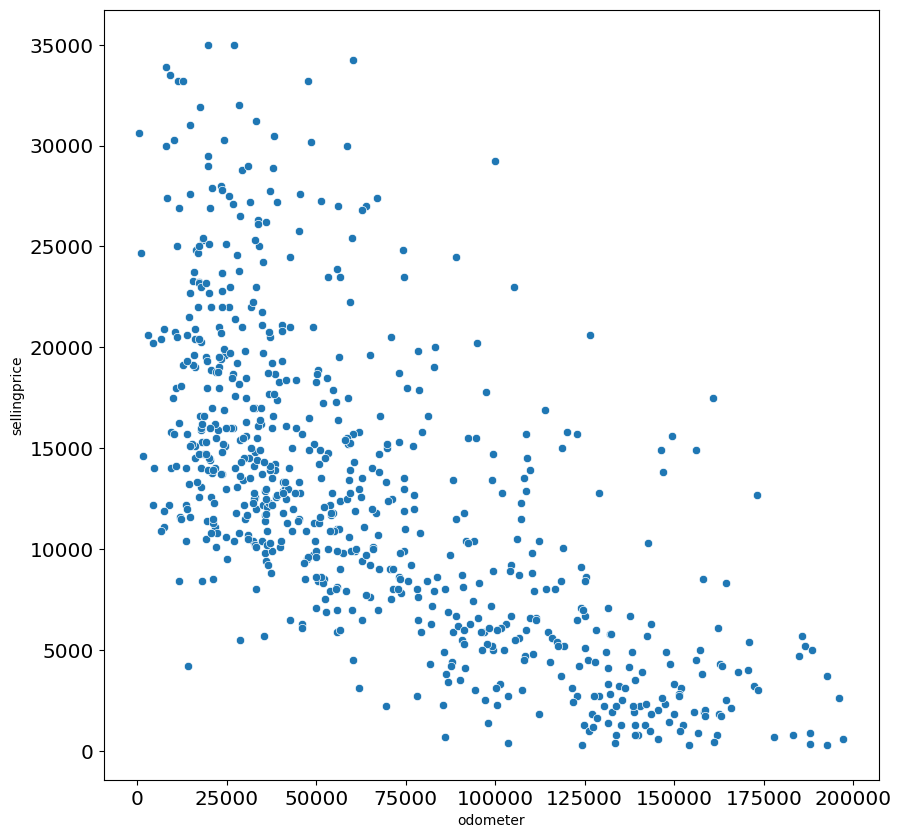

In [ ]:
# odometer
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'odometer', y= 'sellingprice', data=df.sample(700))

The higher the odometer, the lower the price of the car being sold.

<Axes: xlabel='year', ylabel='sellingprice'>

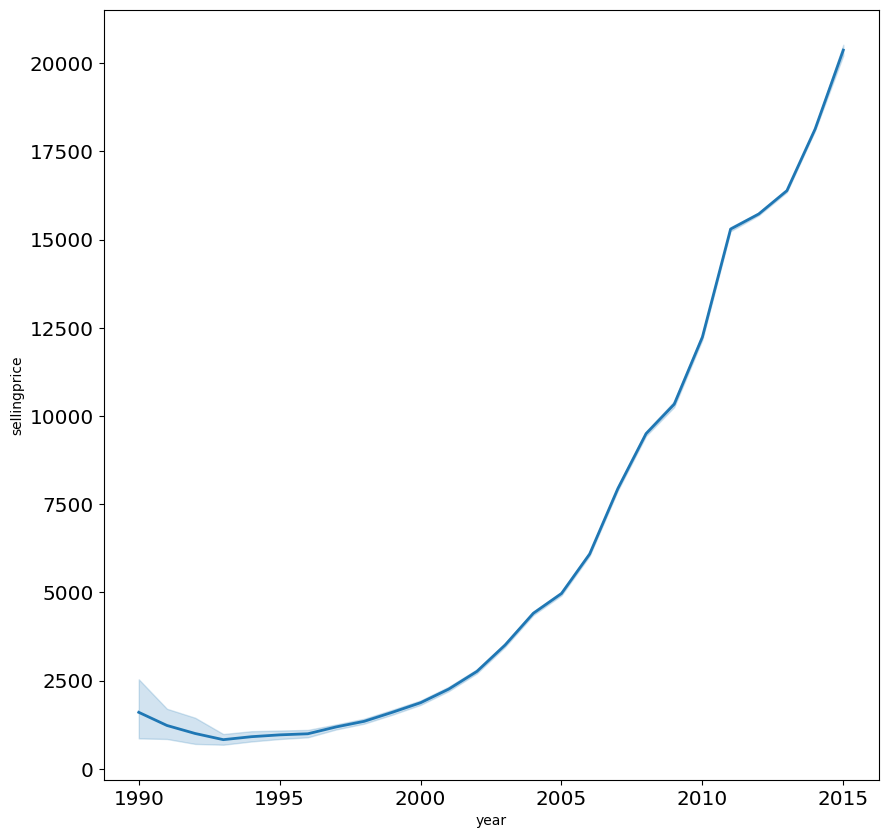

In [ ]:
# year
plt.figure(figsize=(10,10))
sns.lineplot(x='year', y='sellingprice', data=df)

The newer the year, the more expensive the car sold will be.

<Axes: xlabel='sellingprice', ylabel='Density'>

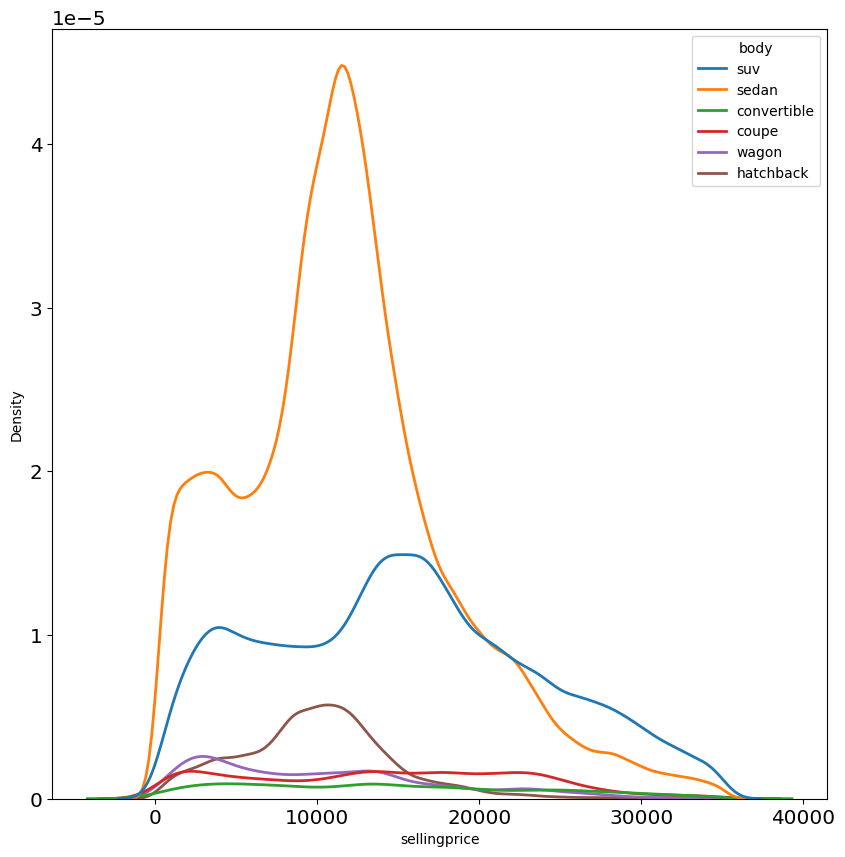

In [ ]:
# body label
plt.figure(figsize=(10,10))
body_top = df[df['body'].isin(['sedan', 'suv', 'hatchback', 'minivan', 'coupe', 'crew cab', 'wagon', 'convertible', 'supercrew', 'g sedan'])]
sns.kdeplot(x='sellingprice', hue='body', data=body_top)

The distribution of car prices based on body is quite even based on price.